# **Road Accident Severity Classification**

## Goal Of the project


 Analyse road traffic accident data to reduce
   the frequency and severity of accidents.
 Develop insights to improve road safety measures and traffic management systems.

## Description of Dataset:

This data set is collected from Addis Ababa Sub-city police departments for master's research work. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms.

## About the Data:
The target feature is Accident_severity which is a multi-class variable. The task is to classify this variable based on the other 31 features step-by-step by going through each day's task. Your metric for evaluation will be f1-score





## Libraries

In [ ]:
# ------------------------------
# Data Wrangling and Manipulation
# ------------------------------
import numpy as np  # For numerical computations and array operations
import pandas as pd  # For handling and manipulating structured data.

# ------------------------------
# Data Visualization
# ------------------------------
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced statistical visualizations

# ------------------------------
# Data Preprocessing & Feature Engineering
# ------------------------------
from sklearn.preprocessing import StandardScaler  # Standardization (mean=0, variance=1)
from sklearn.preprocessing import MinMaxScaler  # Normalization (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder  # Encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder  # Converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer  # Handles missing values

# ------------------------------
# Dimensionality Reduction & Feature Selection
# ------------------------------
from sklearn.decomposition import PCA  # Principal Component Analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest, f_classif  # Feature selection techniques

# ------------------------------
# Model Selection and Evaluation
# ------------------------------
from sklearn.model_selection import train_test_split  # Splits dataset into training and test sets
from sklearn.model_selection import cross_validate  # Performs cross-validation
from sklearn.model_selection import KFold  # K-Fold cross-validation
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning using grid search

# ------------------------------
# Performance Metrics
# ------------------------------
from sklearn.metrics import accuracy_score  # Evaluates model accuracy
from sklearn.metrics import confusion_matrix  # Computes confusion matrix
from sklearn.metrics import classification_report  # Precision, recall, F1-score summary
from sklearn.metrics import precision_score  # Precision metric
from sklearn.metrics import recall_score  # Recall metric
from sklearn.metrics import roc_auc_score  # AUC-ROC score for evaluating classifiers
from sklearn import metrics  # Collection of evaluation metrics

# ------------------------------
# Handling Imbalanced Datasets
# ------------------------------
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique (for handling class imbalance)
from sklearn.utils import class_weight  # Assigns weights to imbalanced classes

# ------------------------------
# Machine Learning Algorithms - Classification
# ------------------------------
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier
from xgboost import XGBClassifier  # Extreme Gradient Boosting classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.ensemble import ExtraTreesClassifier  # Extra Trees classifier
from sklearn.linear_model import SGDClassifier  # Stochastic Gradient Descent classifier

# ------------------------------
# Utility Functions
# ------------------------------
from sklearn.pipeline import make_pipeline  # Creates machine learning pipelines
from sklearn.datasets import make_classification  # Generates synthetic classification datasets
from sklearn import model_selection  # Various model selection utilities
from sklearn import svm  # Support Vector Machines module
from sklearn import tree  # Decision tree-related utilities


## Reading and understanding the data

In [ ]:
rta=pd.read_csv('/content/Road Traffic Accidents Dataset (1).csv')
rta.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## Summarized information of columns in Dataset

In [ ]:
print(f"RTA Dataset has {rta.shape[0]} occurences and {rta.shape[1]} features!")

RTA Dataset has 12316 occurences and 32 features!


In [ ]:
print("The features of RTA Dataset are:")

features = len(rta.columns)
features_list = [feature for feature in rta.columns]

for feature in features_list:
    print(feature)

The features of RTA Dataset are:
Time
Day_of_week
Age_band_of_driver
Sex_of_driver
Educational_level
Vehicle_driver_relation
Driving_experience
Type_of_vehicle
Owner_of_vehicle
Service_year_of_vehicle
Defect_of_vehicle
Area_accident_occured
Lanes_or_Medians
Road_allignment
Types_of_Junction
Road_surface_type
Road_surface_conditions
Light_conditions
Weather_conditions
Type_of_collision
Number_of_vehicles_involved
Number_of_casualties
Vehicle_movement
Casualty_class
Sex_of_casualty
Age_band_of_casualty
Casualty_severity
Work_of_casuality
Fitness_of_casuality
Pedestrian_movement
Cause_of_accident
Accident_severity


In [ ]:
rta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
rta.describe(include=['O']).T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


In [ ]:
rta.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

Inference:

* As per Information of feature values and data visibility, 16 columns has null values and the rest 15 too may have some 'unknown' values.
* From the entire features list only two columns are of numerical category and rest all are of categorical/string category.



## Visualizations of the features

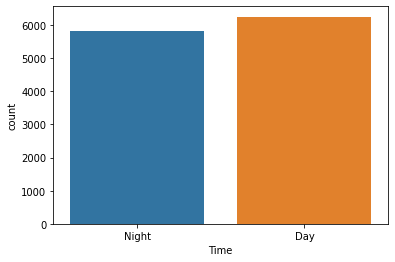

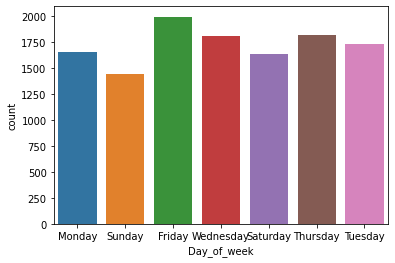

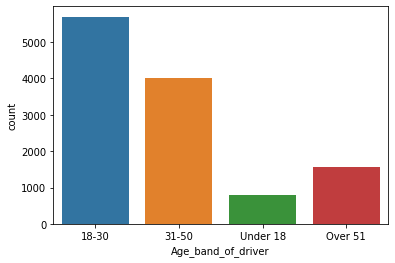

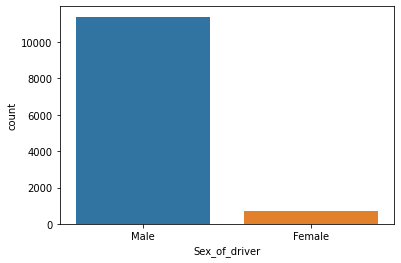

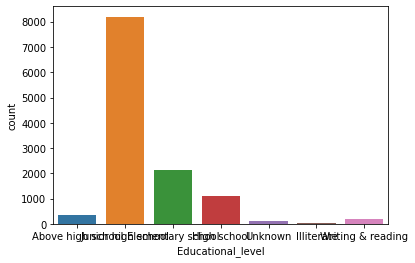

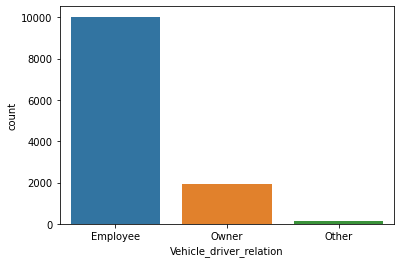

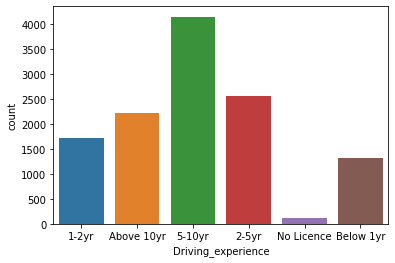

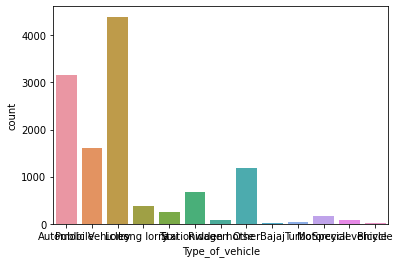

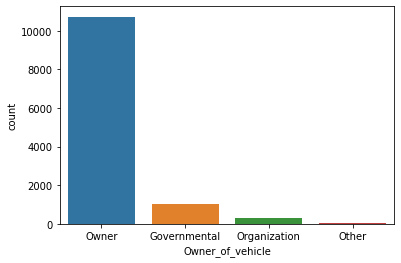

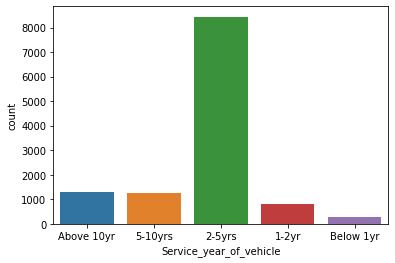

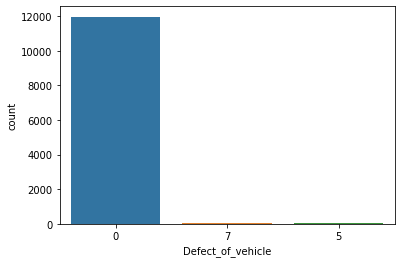

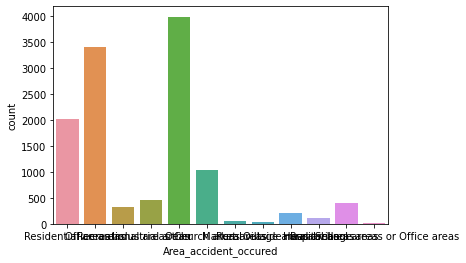

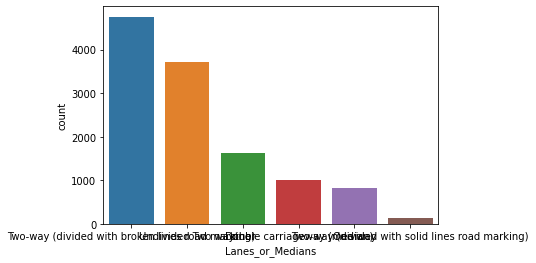

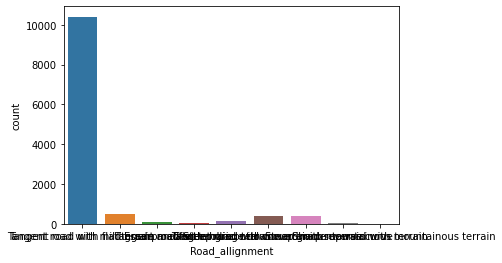

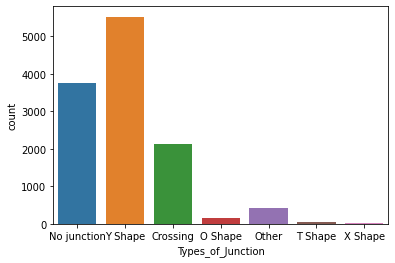

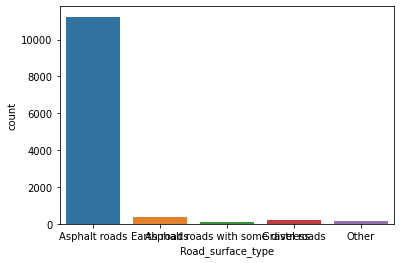

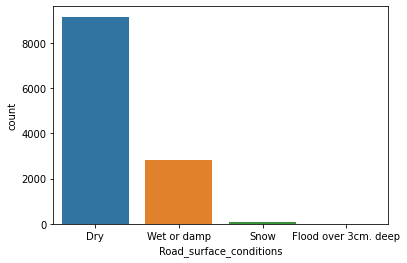

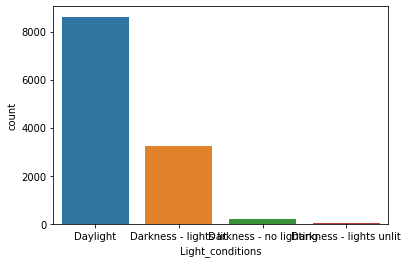

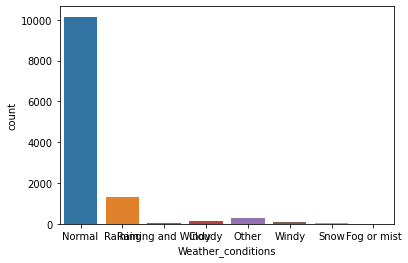

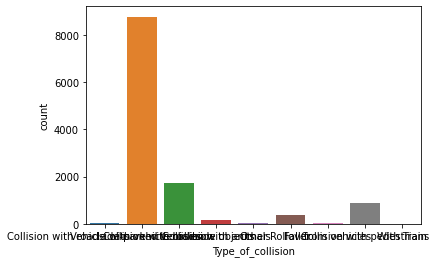

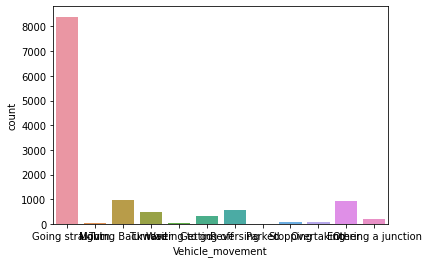

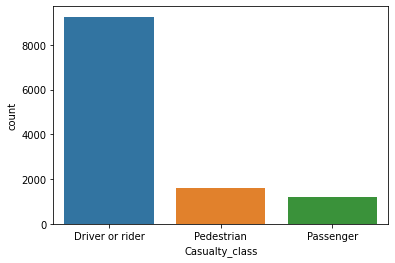

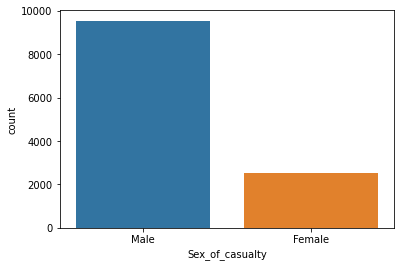

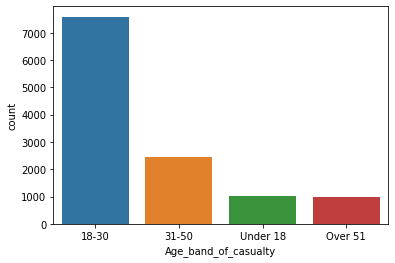

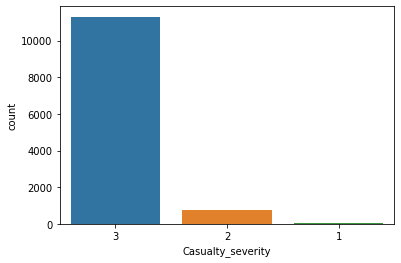

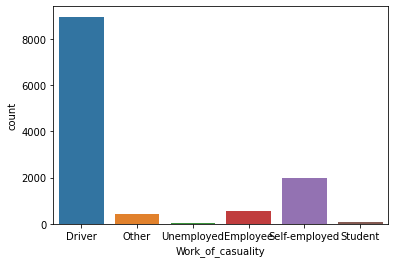

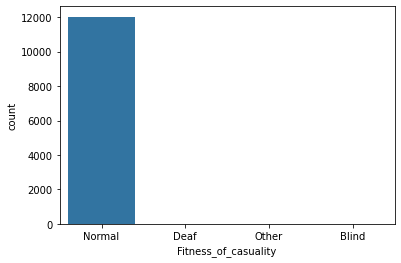

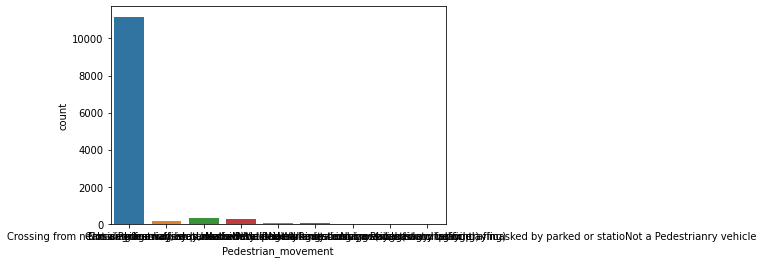

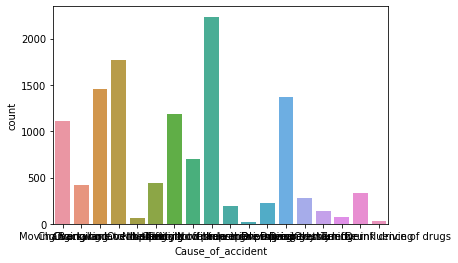

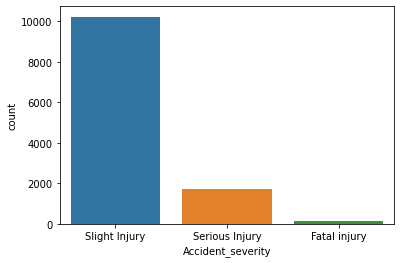

In [ ]:
for col in rta.select_dtypes(include='object'):
    if rta[col].nunique() <= 22:
        sns.countplot(x=col, data=rta)
        plt.show()

###Date&Time

In [ ]:
rta['Time'].value_counts()

15:30:00    120
17:10:00    110
18:30:00    103
11:30:00     99
17:00:00     98
           ... 
19:04:00      1
20:36:00      1
22:54:00      1
21:03:00      1
2:47:00       1
Name: Time, Length: 1074, dtype: int64

Convert 'Time' column from string <HH:MM:SS> to "Day"/"Night"

In [ ]:

def formatTimeCol(t):
    t = t[:2]
    if ":" in t:
        t = t[:1]

    return int(t)

def categorizeTimeCol(t):
    if t >= 8 and t< 17:
        return "Day"
    else:
        return "Night"


rta['Time'] = rta['Time'].apply(lambda x: formatTimeCol(x))
rta['Time'] = rta['Time'].apply(lambda x: categorizeTimeCol(x))

rta['Time'].value_counts(dropna=False)


,count
Time,
Day,6387
Night,5929


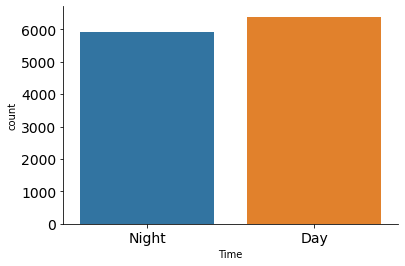

In [ ]:
sns.countplot(x=rta["Time"])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)


In [ ]:
rta['Day_of_week'].value_counts()

Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: Day_of_week, dtype: int64

In [ ]:
# Extracting hour from timestamp.

#rta['hour'] = pd.to_datetime(rta['Time']).dt.hour

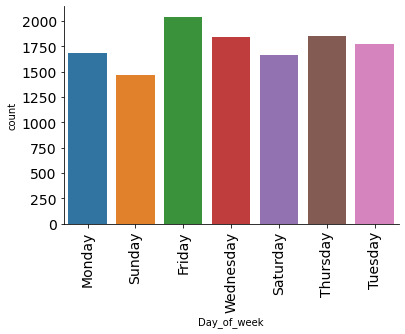

In [ ]:
cp=sns.countplot(x=rta["Day_of_week"])

plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)


Inference on Time:

* Most of the accidents Occured on Friday
* Occured at Day time 8AM and 5PM(office & school hours)
* Sunday has less number of accidents

###Driver

In [ ]:
rta['Age_band_of_driver'].value_counts()

18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64

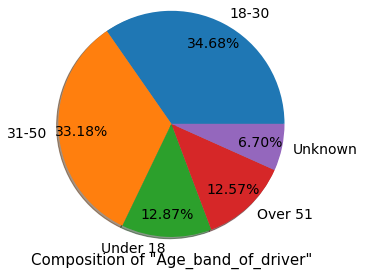

In [ ]:
fig_1=plt.pie(x=rta['Age_band_of_driver'].value_counts(),
        labels=list(rta['Age_band_of_driver'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
plt.xlabel('Composition of "Age_band_of_driver"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

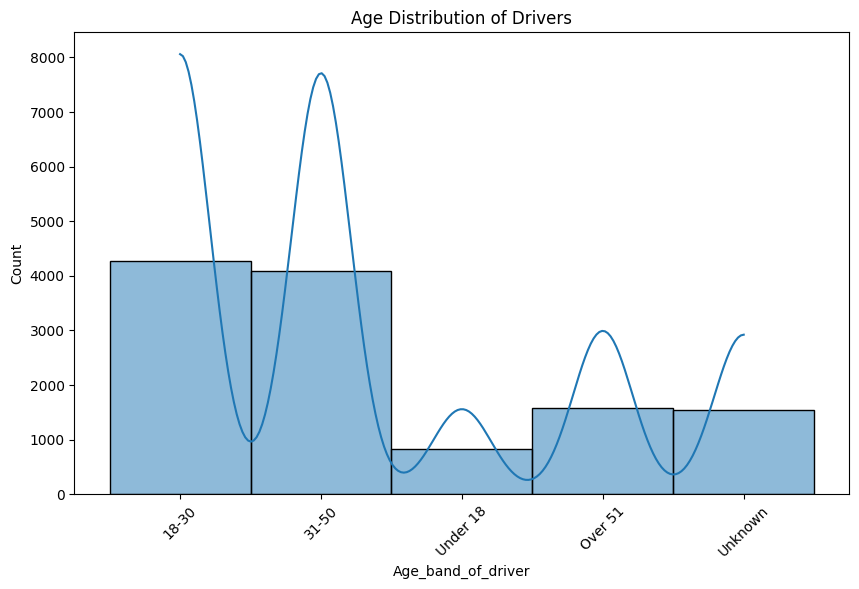

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(rta['Age_band_of_driver'], kde=True, bins=10)
plt.title("Age Distribution of Drivers")
plt.xticks(rotation=45)
plt.show()

In [ ]:
rta['Sex_of_driver'].value_counts()
#to drop

Male       11437
Female       701
Unknown      178
Name: Sex_of_driver, dtype: int64

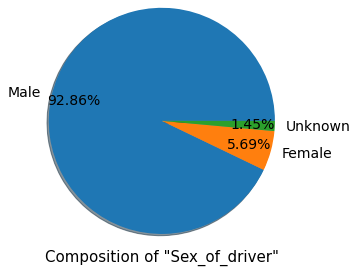

In [ ]:
plt.pie(x=rta['Sex_of_driver'].value_counts(),
        labels=list(rta['Sex_of_driver'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
plt.xlabel('Composition of "Sex_of_driver"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [ ]:
rta['Educational_level'].value_counts()

Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: Educational_level, dtype: int64

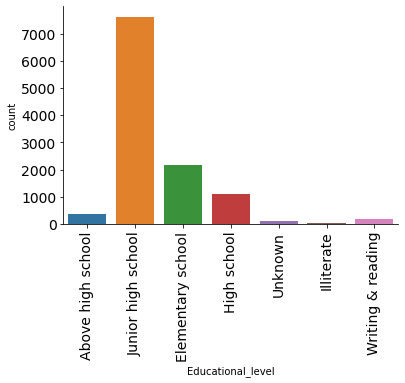

In [ ]:
cp = sns.countplot(x=rta["Educational_level"])

plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)


In [ ]:
print('Vehicle driver relations are like:')
rta['Vehicle_driver_relation'].value_counts()

Vehicle driver relations are like:


Employee    9627
Owner       1973
Other        123
Unknown       14
Name: Vehicle_driver_relation, dtype: int64

In [ ]:
rta['Driving_experience'].value_counts()

5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: Driving_experience, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


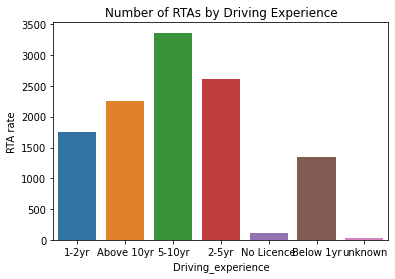

In [ ]:
sns.countplot(rta['Driving_experience'])
plt.xlabel("Driving_experience")
plt.ylabel("RTA rate")
plt.title("Number of RTAs by Driving Experience")
plt.show()

In [ ]:
rta['Owner_of_vehicle'].value_counts()

Owner           10459
Governmental     1041
Organization      312
Other              22
Name: Owner_of_vehicle, dtype: int64

Inference on Driver's features:

* Most of the drivers are male between 18-30 age group and with 5-10 yrs of driving experience.
* **Number of RTAs by Gender of Drivers:-** In terms of gender, male drivers have been the main cause of traffic accidents by taking
88% of accidents. However, in the current data collection or data gained from the Addis
Ababa Traffic Police Commission data, there is no information on the number of vehicles
driven by males and females in Addis Ababa.
* Majority of the drivers who got accident are employees.
* **Number of RTAs by the Driving Experience of the Driver:-** From this, it can be seen that experienced drivers are not only experienced in high-risk
accidents but also in terms of human behavior. There are also reports of accidents involving
unlicensed drivers, who are in violation of the law and endanger lives and property.
* **Road RTAs by the Educational Level of Drivers:-** According to the data, the highest number of the accident reported at the junior high school educational level of drivers. In
this comparison, the risk of most drivers at this education level is related to the problems
we have seen in the age group. This does not mean that all drivers at this level of education
are in their teens, but they do take part.
* Most of the accidents occured in personally owned passenger vehicle.

###Vehicle

In [ ]:
rta['Type_of_vehicle'].value_counts()

Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: Type_of_vehicle, dtype: int64

In [ ]:
rta['Service_year_of_vehicle'].value_counts()

Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: Service_year_of_vehicle, dtype: int64

In [ ]:
rta['Defect_of_vehicle'].value_counts()

No defect    7777
7              76
5              36
Name: Defect_of_vehicle, dtype: int64

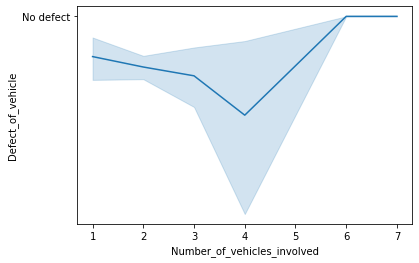

In [ ]:
sns.lineplot(data=rta,y='Defect_of_vehicle',x='Number_of_vehicles_involved')

Inference on vehicle features:
* Most of the vehicles dont have any defects. but still got accident
* Most of the service_year is unknown

###Accident Area

In [ ]:
rta['Area_accident_occured'].value_counts()
#edit

Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: Area_accident_occured, dtype: int64

In [ ]:
rta['Area_accident_occured'] = rta['Area_accident_occured'].str.strip()
rta['Area_accident_occured'].value_counts()

Other                              3819
Office areas                       3451
Residential areas                  2060
Church areas                       1060
Industrial areas                    456
School areas                        415
Recreational areas                  328
Outside rural areas                 218
Hospital areas                      121
Market areas                         63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Name: Area_accident_occured, dtype: int64

In [ ]:
rta['Types_of_Junction'].value_counts()

Y Shape        4543
No junction    3837
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: Types_of_Junction, dtype: int64

Inference on Accident Area:
*  Majority of accidents occured in office areas rather than residential areas.
* Majority of accidents occured in Y type junction and least number of accidents in X type junction

###Road & Weather

In [ ]:
rta['Lanes_or_Medians'].value_counts()

Two-way (divided with broken lines road marking)    4411
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with solid lines road marking)      142
Unknown                                               57
Name: Lanes_or_Medians, dtype: int64

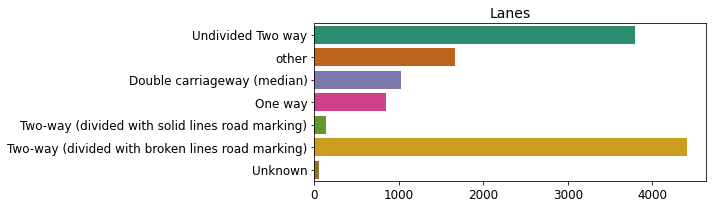

In [ ]:
# checking the Lanes column

plt.figure(figsize=(10,3))
sns.countplot(data=rta, y='Lanes_or_Medians', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [ ]:
rta['Road_allignment'].value_counts()

Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: Road_allignment, dtype: int64

In [ ]:
rta['Road_allignment'].replace('Tangent road with mountainous terrain and','Tangent road with mountainous terrain',inplace=True)
rta['Road_allignment'].value_counts()

Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain              396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: Road_allignment, dtype: int64

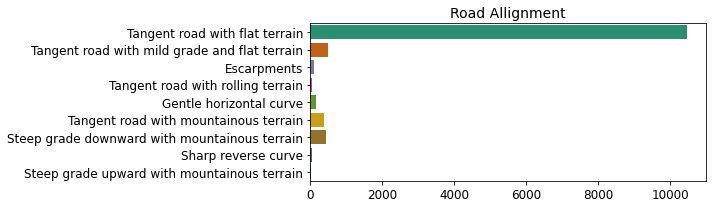

In [ ]:
# Checking the Road Allignment column

plt.figure(figsize=(10,3))
sns.countplot(data=rta, y='Road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [ ]:
rta['Road_surface_type'].value_counts()

Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: Road_surface_type, dtype: int64

In [ ]:
rta[ 'Road_surface_conditions'].value_counts()

Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: Road_surface_conditions, dtype: int64

In [ ]:
rta['Light_conditions'].value_counts()

Daylight                   8798
Darkness - lights lit      3286
Darkness - no lighting      192
Darkness - lights unlit      40
Name: Light_conditions, dtype: int64

In [ ]:
rta['Weather_conditions'].value_counts()

Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: Weather_conditions, dtype: int64

Inference on Road features:
* Most of the accidents
Occured at two-way lines in dry surface road
* Majority of accidents occured in normal day light and in normal whether condition.

###Collision

In [ ]:
rta['Type_of_collision'].value_counts()

Vehicle with vehicle collision             8774
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: Type_of_collision, dtype: int64

In [ ]:
rta['Number_of_vehicles_involved'].value_counts()

2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: Number_of_vehicles_involved, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


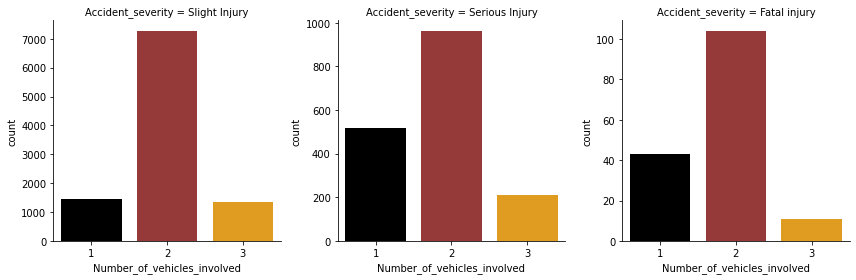

In [ ]:
# creating a facet grid with columns as survived=0 and survived=1
grid = sns.FacetGrid(data=rta, col='Accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

In [ ]:
rta['Vehicle_movement'].value_counts()

Going straight         8158
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Getting off             339
Entering a junction     193
Overtaking               96
Unknown                  88
Stopping                 61
U-Turn                   50
Waiting to go            39
Parked                   10
Name: Vehicle_movement, dtype: int64

Inference on Type of Collision:
* Majority of accidents occured in vehicle-vehicle collision.
* The number of vehicles involved is 2 in majority of accidents.
* Major cause of accident is not keeping sufficient  distance between vehicles and lane changing.

###Casuality


In [ ]:
rta['Number_of_casualties'].value_counts()

1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: Number_of_casualties, dtype: int64

In [ ]:
rta['Casualty_class'].value_counts()

Driver or rider    4944
na                 4443
Pedestrian         1649
Passenger          1280
Name: Casualty_class, dtype: int64

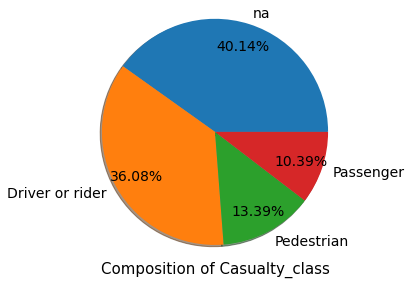

In [ ]:
plt.pie(x=rta['Casualty_class'].value_counts(),
        labels=list(rta['Casualty_class'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
plt.xlabel('Composition of Casualty_class', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [ ]:
rta['Sex_of_casualty'].value_counts()

Male      5253
na        4443
Female    2620
Name: Sex_of_casualty, dtype: int64

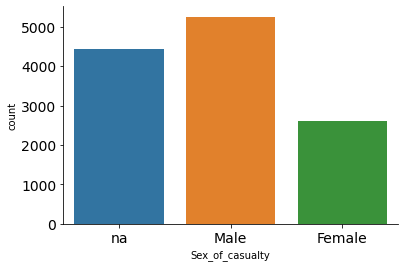

In [ ]:
cp = sns.countplot(x=rta["Sex_of_casualty"])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)


In [ ]:
rta['Age_band_of_casualty'].value_counts()

na          4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: Age_band_of_casualty, dtype: int64

The value 5 is may be a mistake. so wana remove it......

In [ ]:
rta['Age_band_of_casualty'].value_counts()

na          4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: Age_band_of_casualty, dtype: int64

In [ ]:
rta['Work_of_casuality'].value_counts()

Driver           5903
Self-employed    2044
Employee          553
Other             463
Student           103
Unemployed         33
Unknown            19
Name: Work_of_casuality, dtype: int64

In [ ]:
rta['Casualty_severity'].value_counts()

3     7076
na    4443
2      771
1       26
Name: Casualty_severity, dtype: int64

In [ ]:
rta['Fitness_of_casuality'].value_counts()

Normal          9608
NormalNormal      19
Deaf              18
Other             18
Blind             18
Name: Fitness_of_casuality, dtype: int64

In [ ]:
rta['Fitness_of_casuality'].replace('NormalNormal','Normal',inplace=True)
rta['Fitness_of_casuality'].value_counts()

Normal    9627
Deaf        18
Other       18
Blind       18
Name: Fitness_of_casuality, dtype: int64

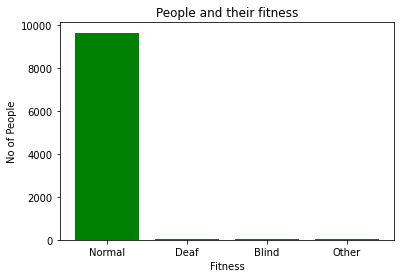

In [ ]:

## Visualization of 'Fitness_of_casuality' feature.
import seaborn as sns
import matplotlib.pyplot as plt

data = rta['Fitness_of_casuality'].value_counts()
keys = ['Normal','Deaf','Blind','Other']

plt.bar(keys,data,color='green')
plt.xlabel("Fitness")
plt.ylabel("No of People")
plt.title("People and their fitness")
plt.show()

Inferences on Casuality details:
* Avg Casuality number is 1
* Severity range  of casuality is 3
* Age Range is 18-30
* Most of people are normally fit.only a few are deaf and blind.
* Male casuality is more compared to female casuality
* Major casuality is driver himself
* Pedestrians are also more
likely affected by the accident.


###Cause of accident

In [ ]:
rta['Pedestrian_movement'].value_counts()

Not a Pedestrian                                                                                                                         11390
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                              337
Unknown or other                                                                                                                           293
Crossing from driver's nearside                                                                                                            140
Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle                                                               72
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)                                                              46
Walking along in carriageway, back to traffic                                                                                               18

<ipython-input-57-f7f39b88c1ca>:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


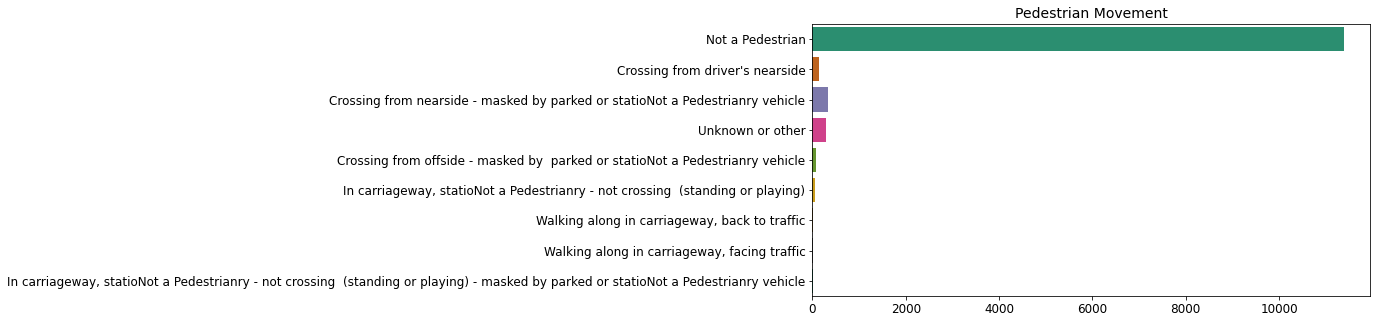

In [ ]:
# Checking the Pedestrian Movement column

plt.figure(figsize=(10,5))
sns.countplot(data=rta, y='Pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [ ]:
rta['Cause_of_accident'].value_counts()

No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: Cause_of_accident, dtype: int64

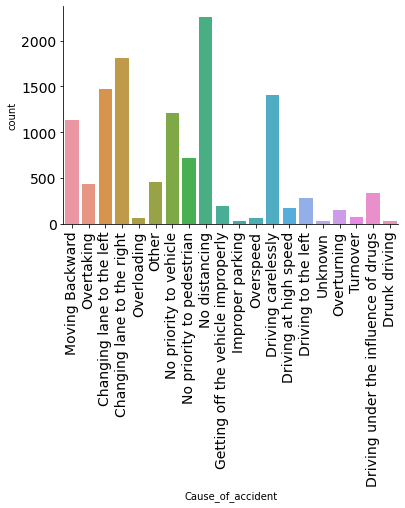

In [ ]:
cp = sns.countplot(x=rta["Cause_of_accident"])

plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)


Major cause of accident is not keeping sufficient distance between vehicles and lane changing.

## Target variable

In [ ]:
rta['Accident_severity'].value_counts()
#target

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

Inference:

So, the target variable has 3 occassions, where Slight Injury marks higher

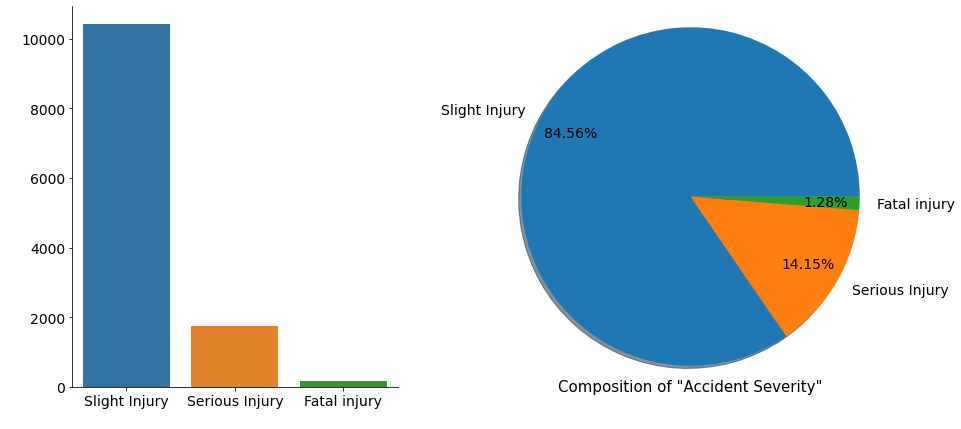

In [ ]:
# checking the target - # Univariate Analysis
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=rta["Accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)

# pieplot
ax2= plt.subplot(1,2,2)
plt.pie(x=rta['Accident_severity'].value_counts(),
        labels=list(rta['Accident_severity'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

Inference:

1. 84% of accidents led to slight injuries.
2. There is large difference between Slight Injuries and Serious Injuries.
3. Only 1.3% of people died in accidents. Instant deaths are less, most people survived with slight injuries and few survived with very serious injuries

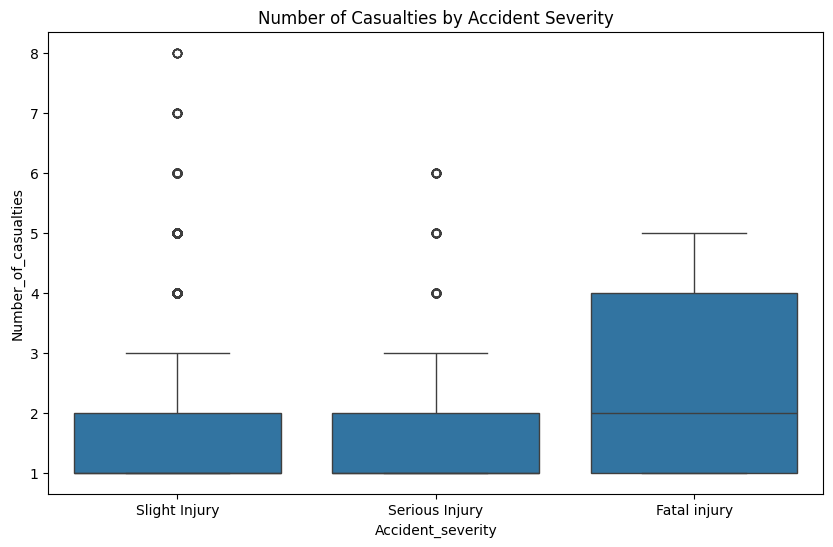

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Accident_severity', y='Number_of_casualties', data=rta)
plt.title("Number of Casualties by Accident Severity")
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


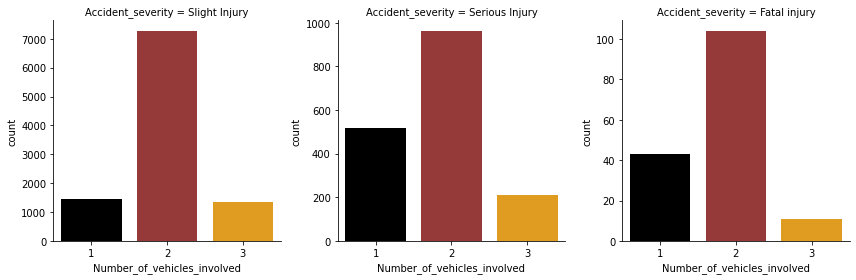

In [ ]:
# creating a facet grid with columns as survived=0 and survived=1
grid = sns.FacetGrid(data=rta, col='Accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


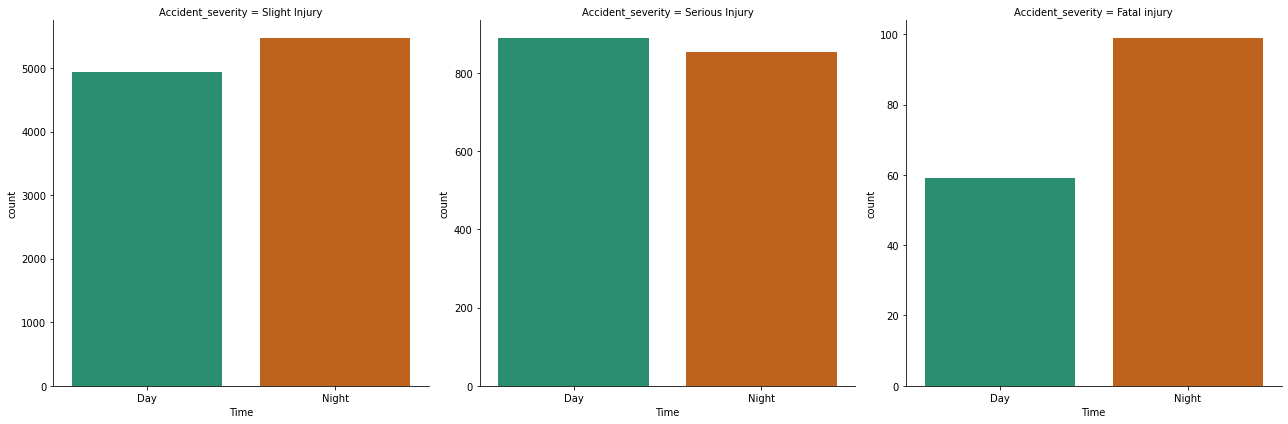

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


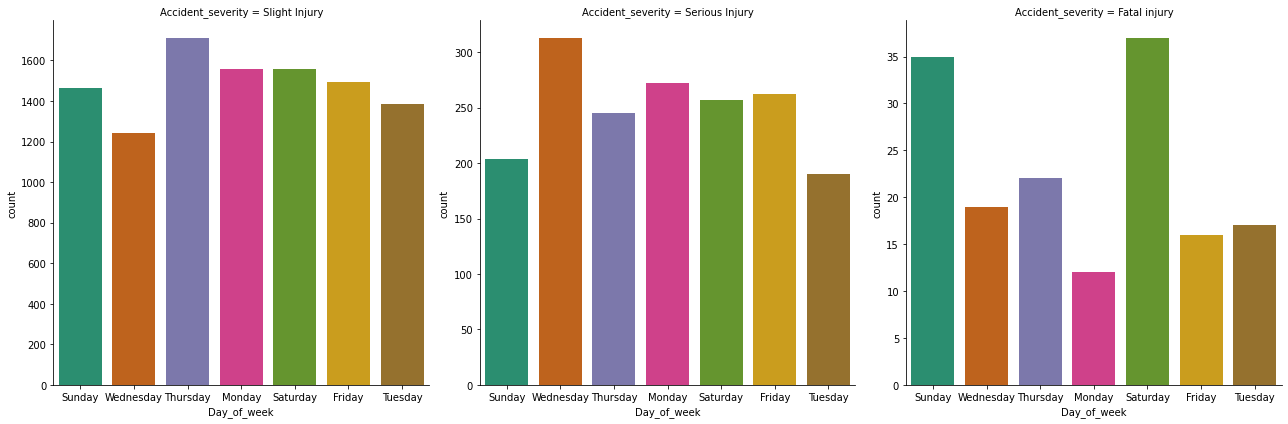

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


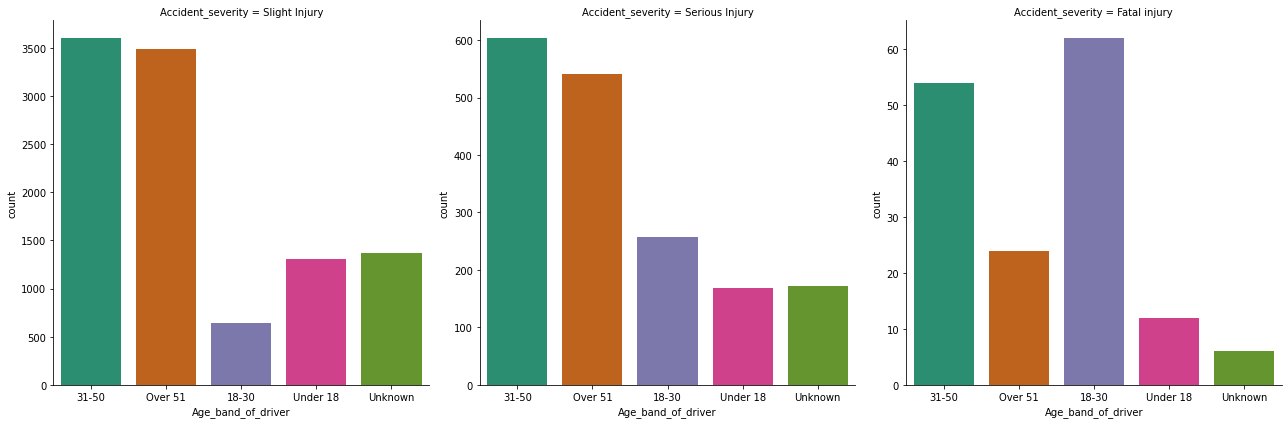

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


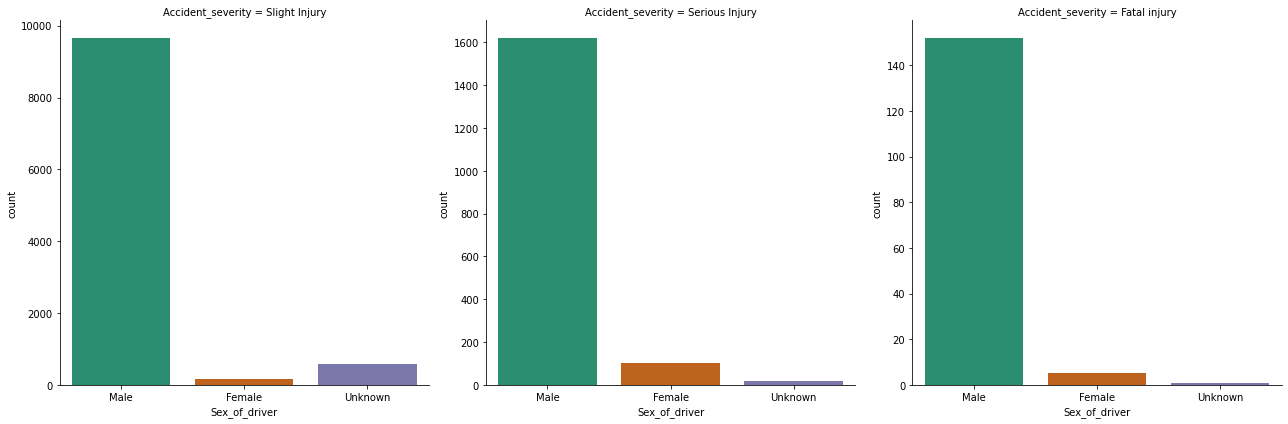

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


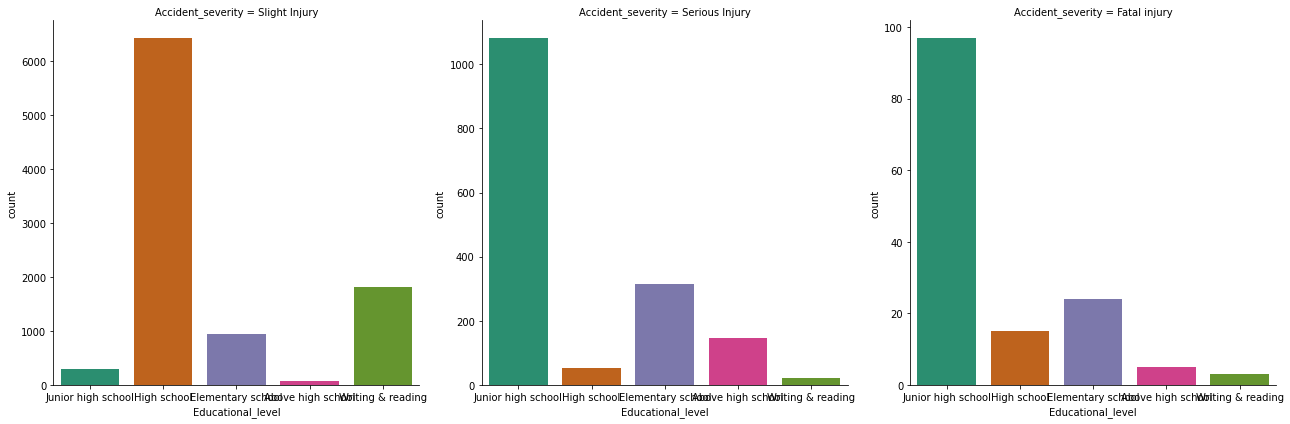

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


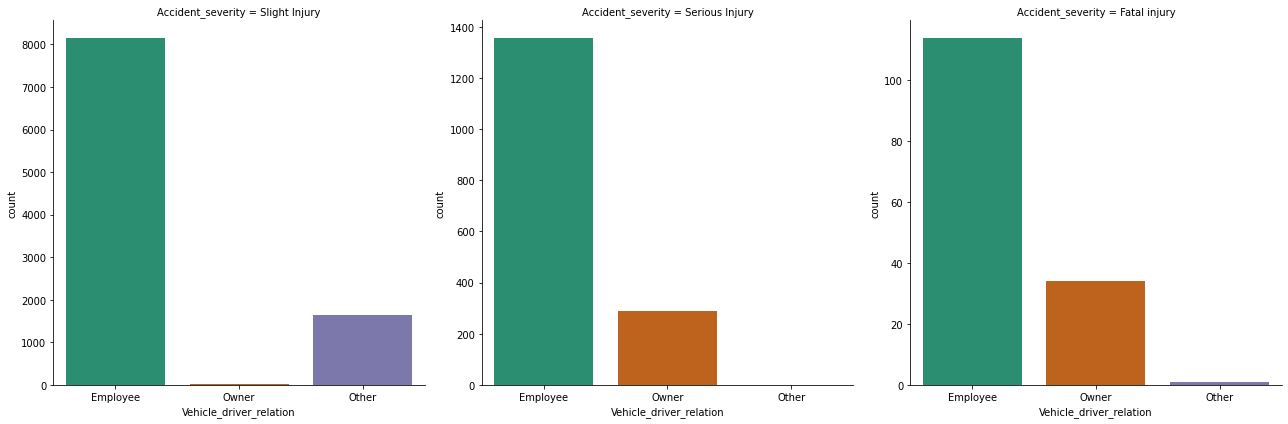

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


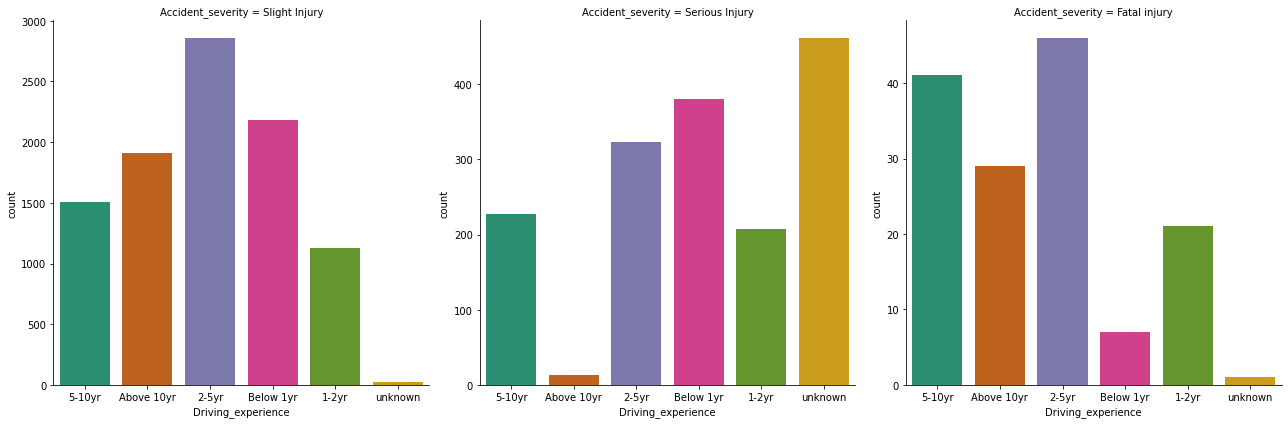

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


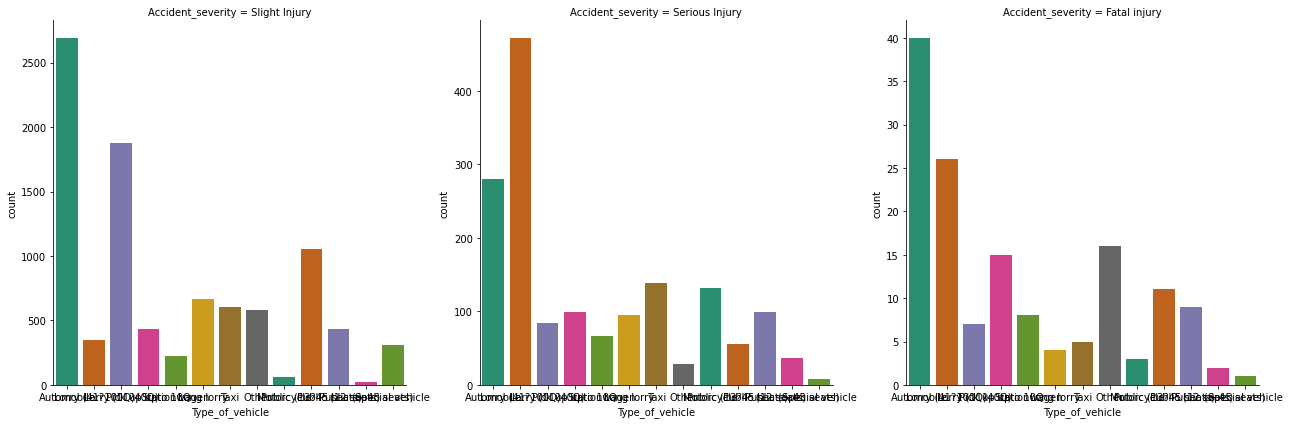

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


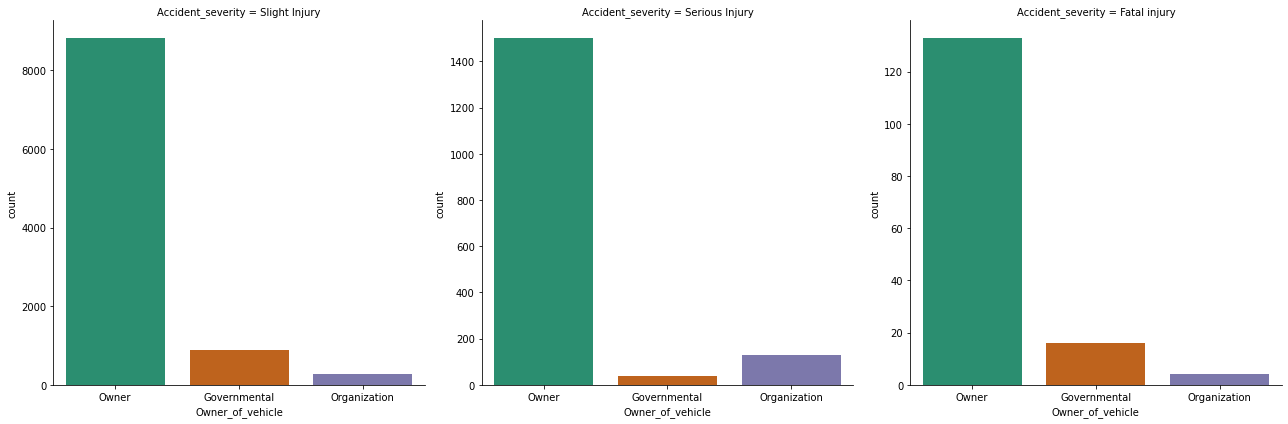

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


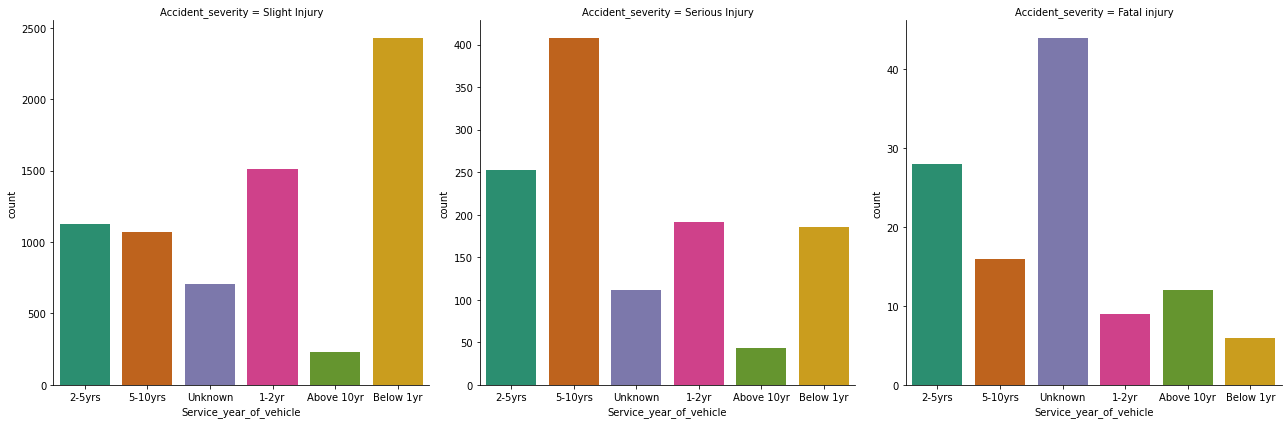

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


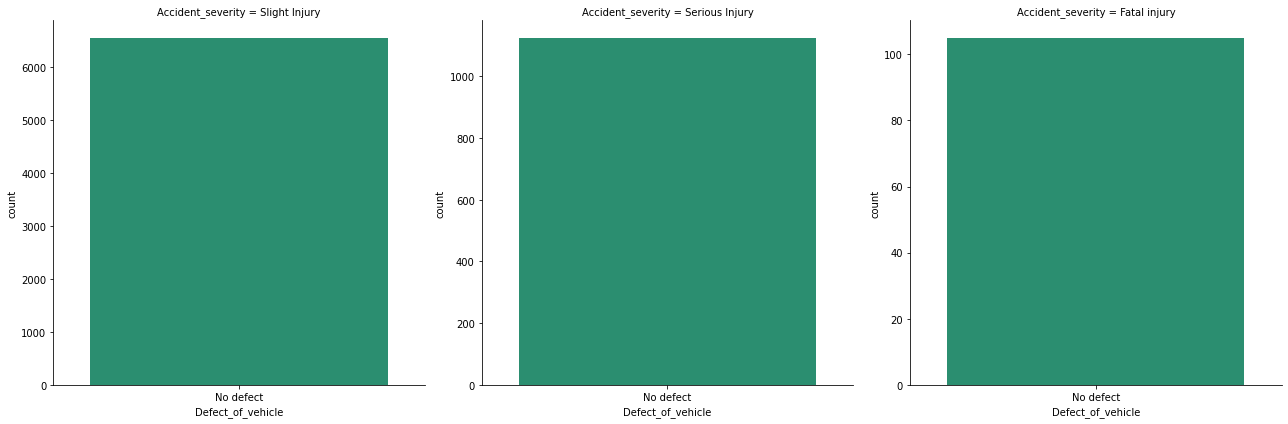

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


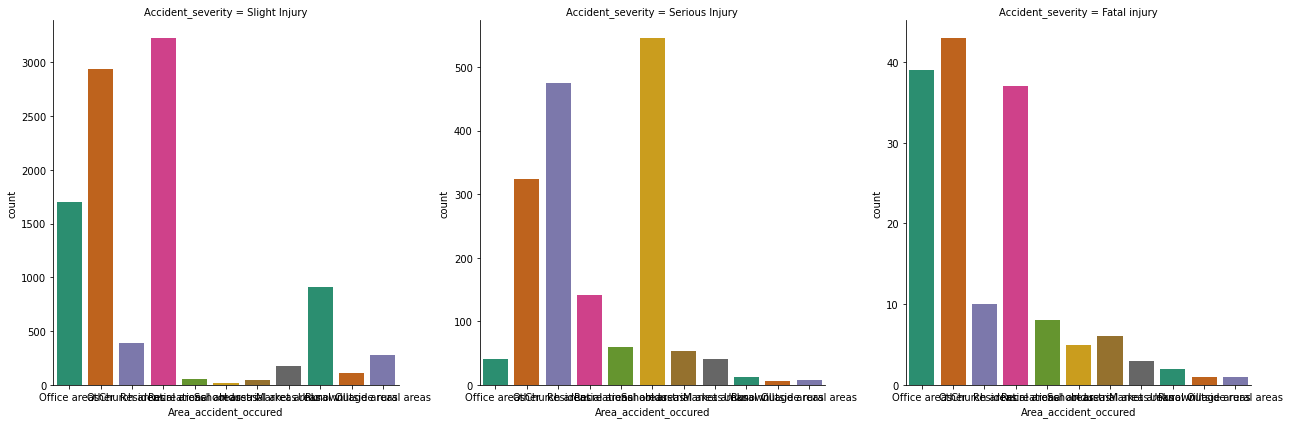

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


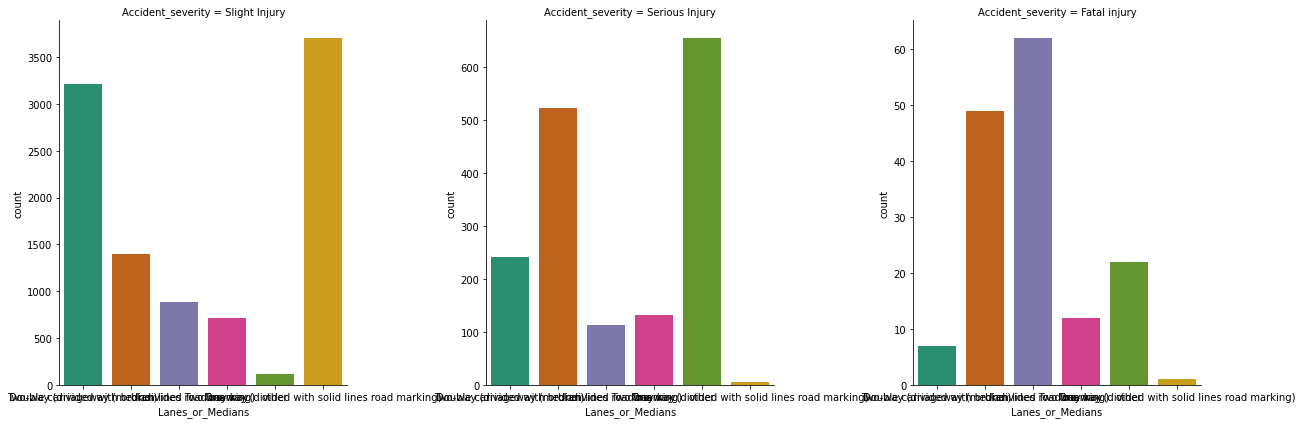

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


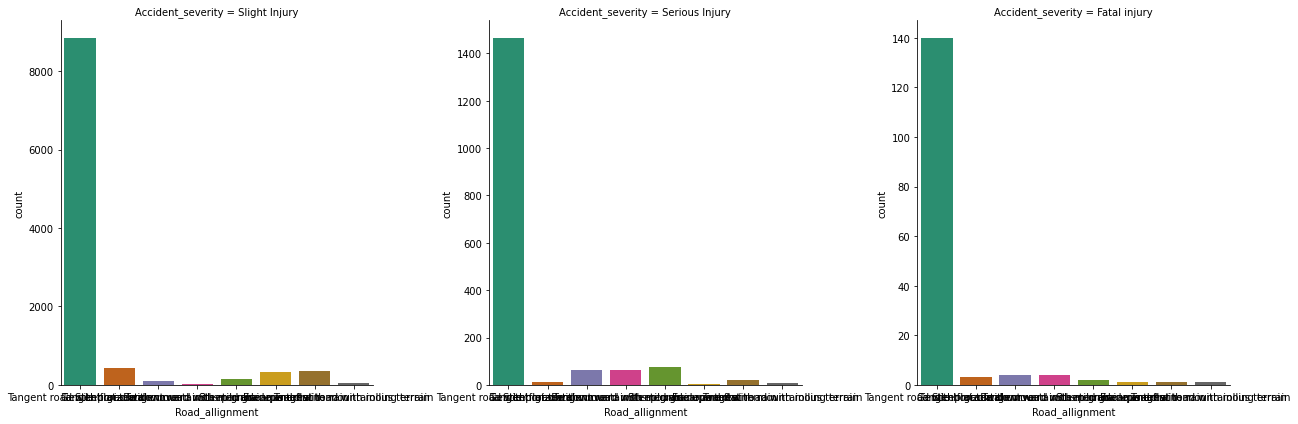

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


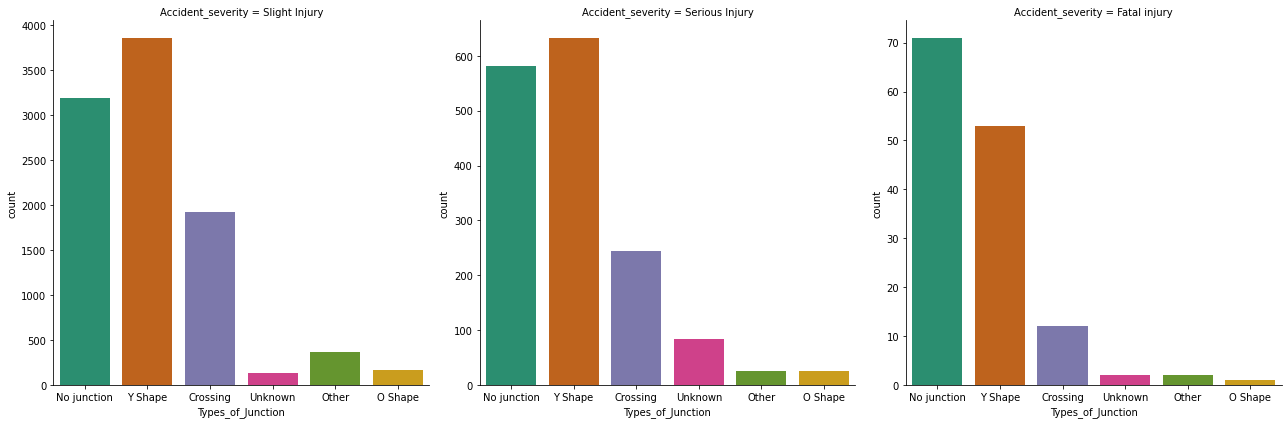

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


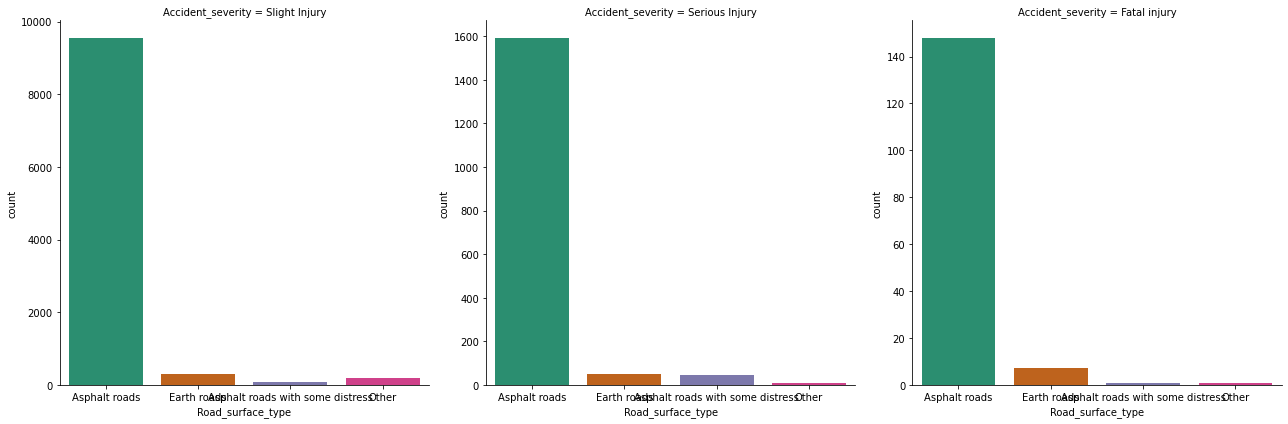

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


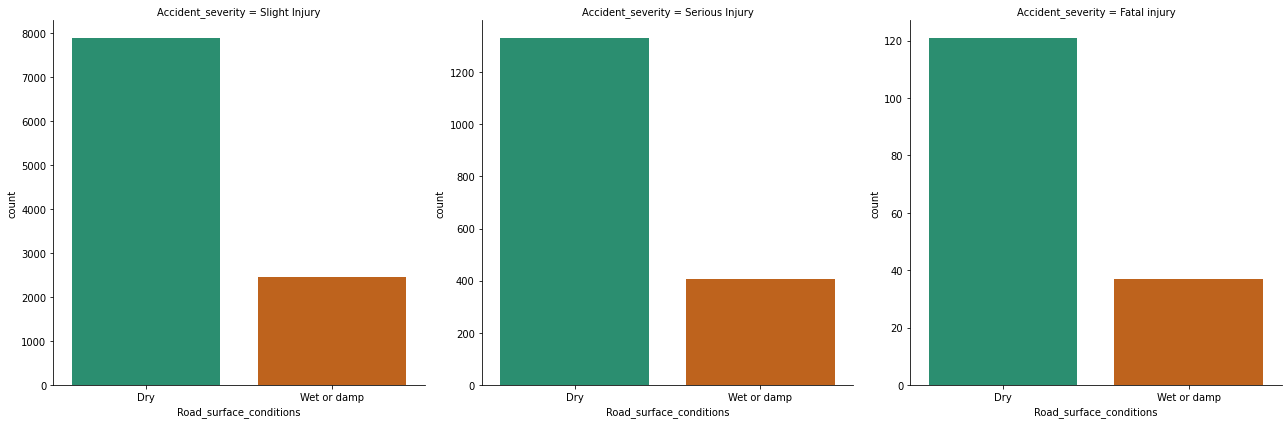

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


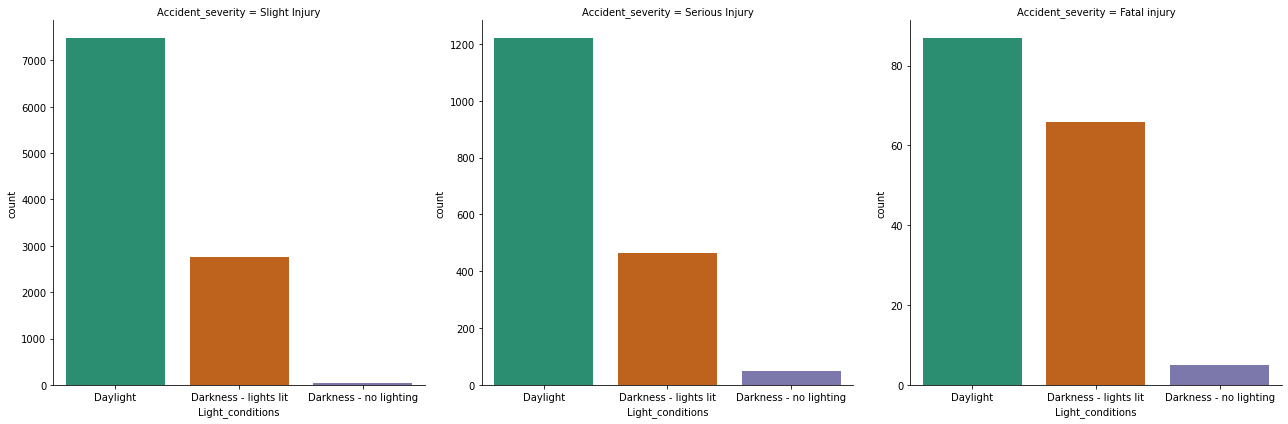

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


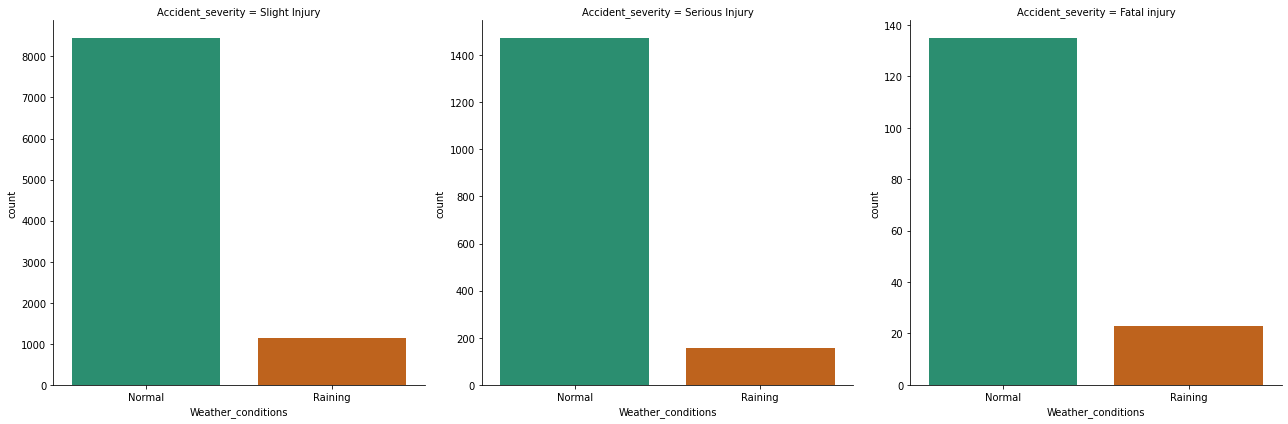

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


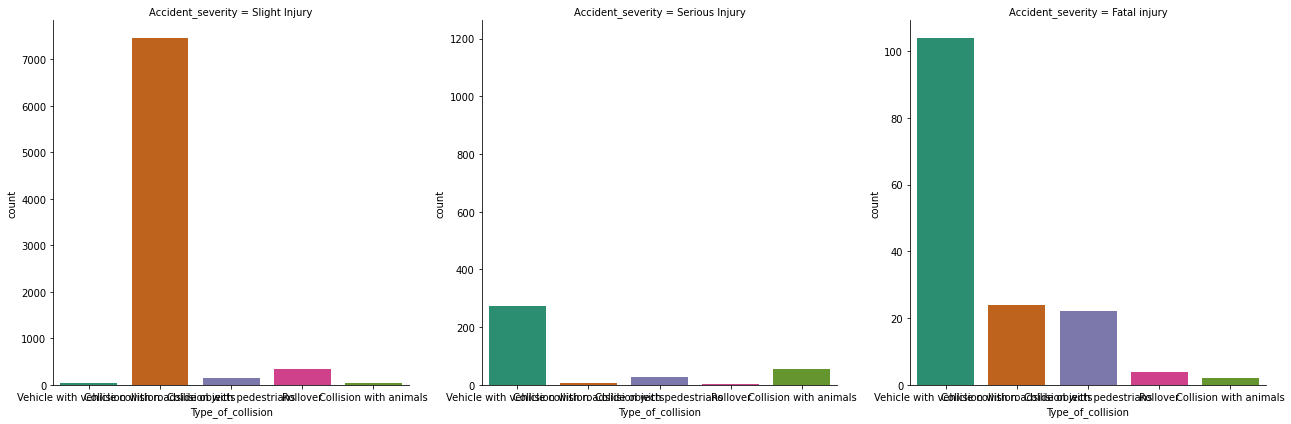

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


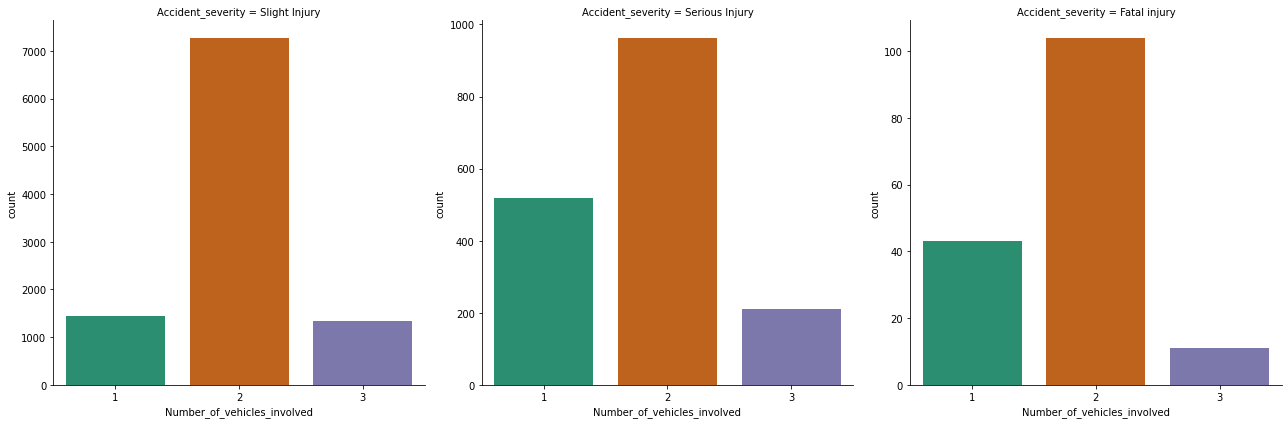

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


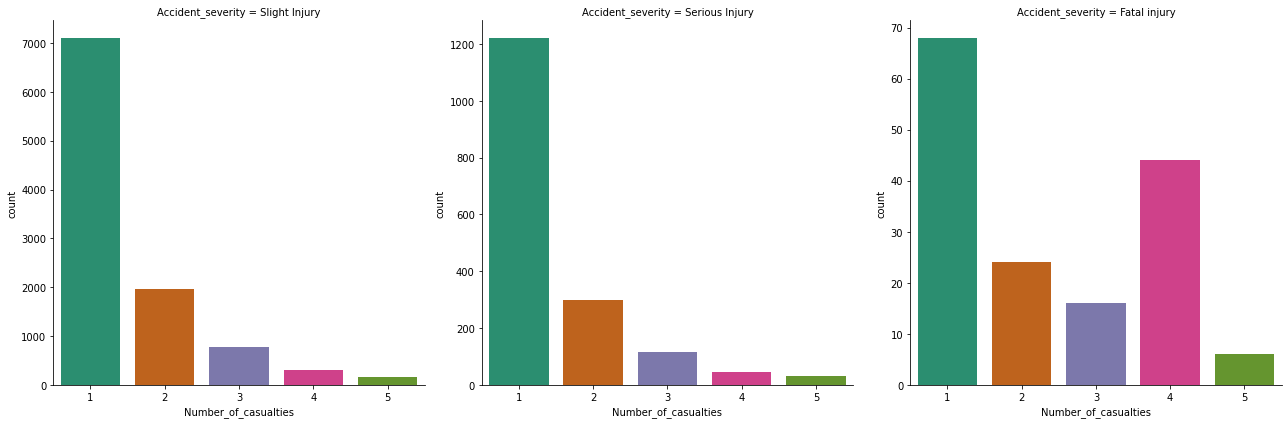

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


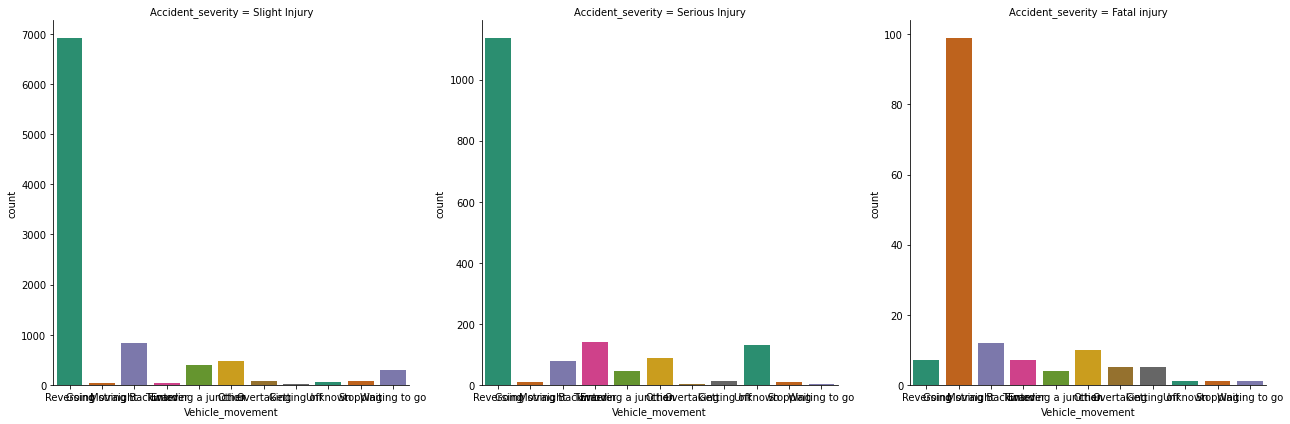

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


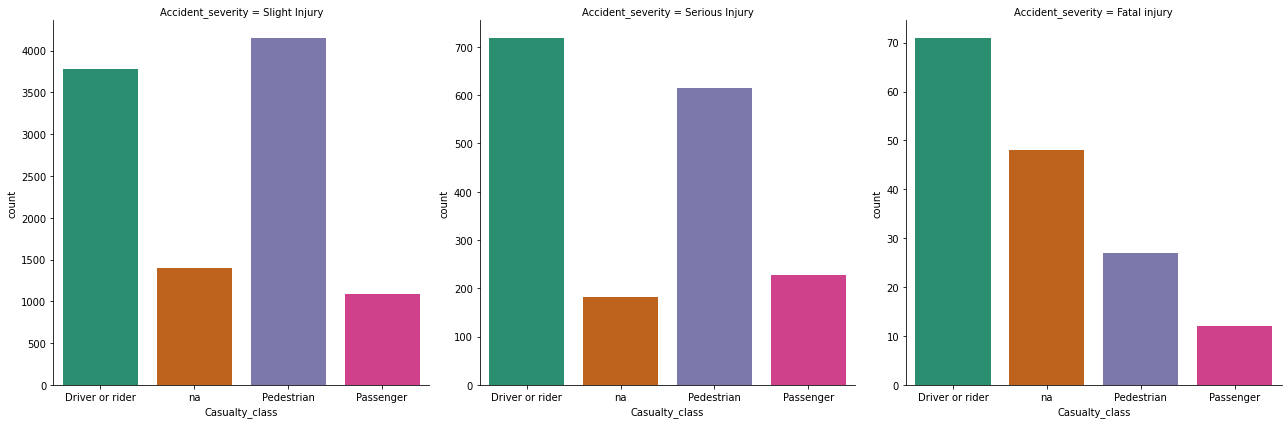

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


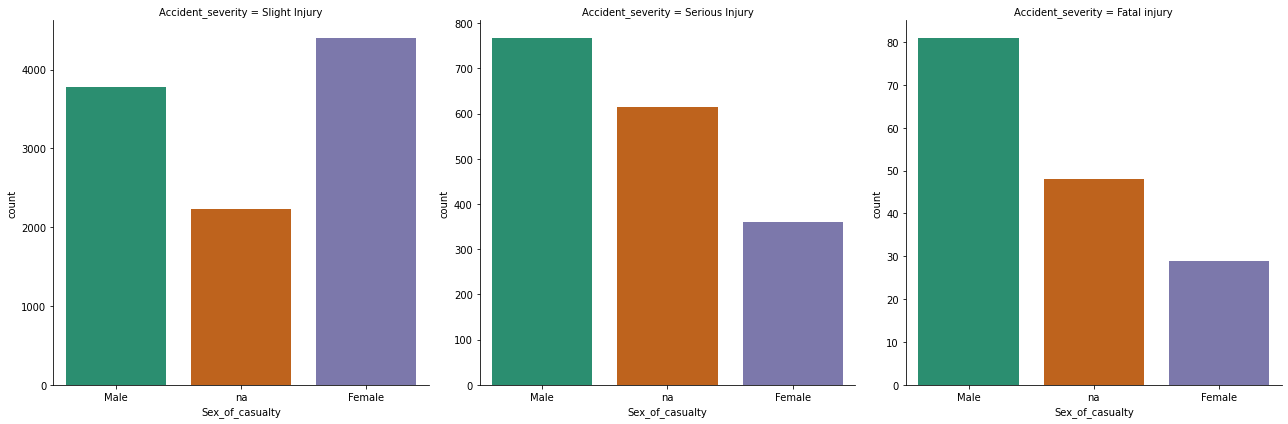

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


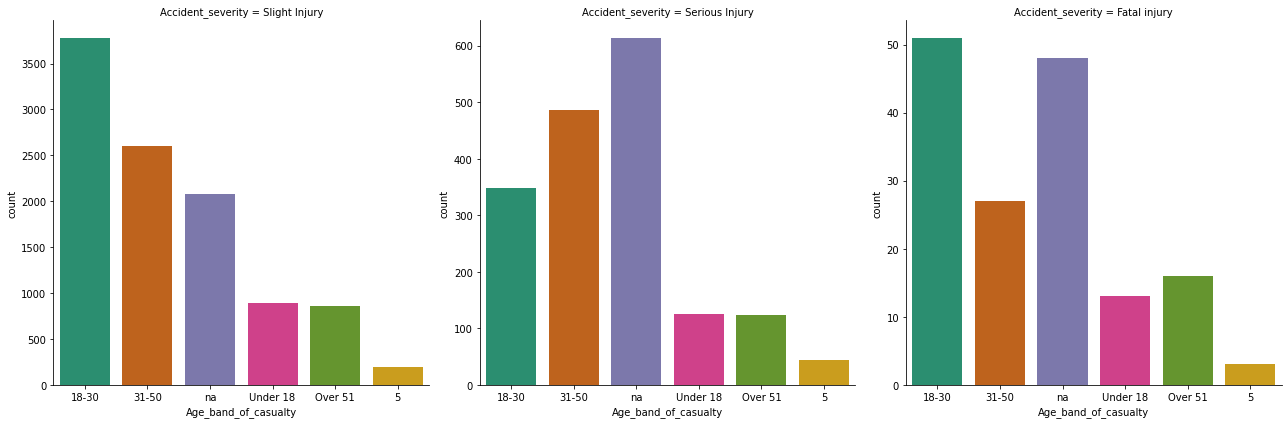

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


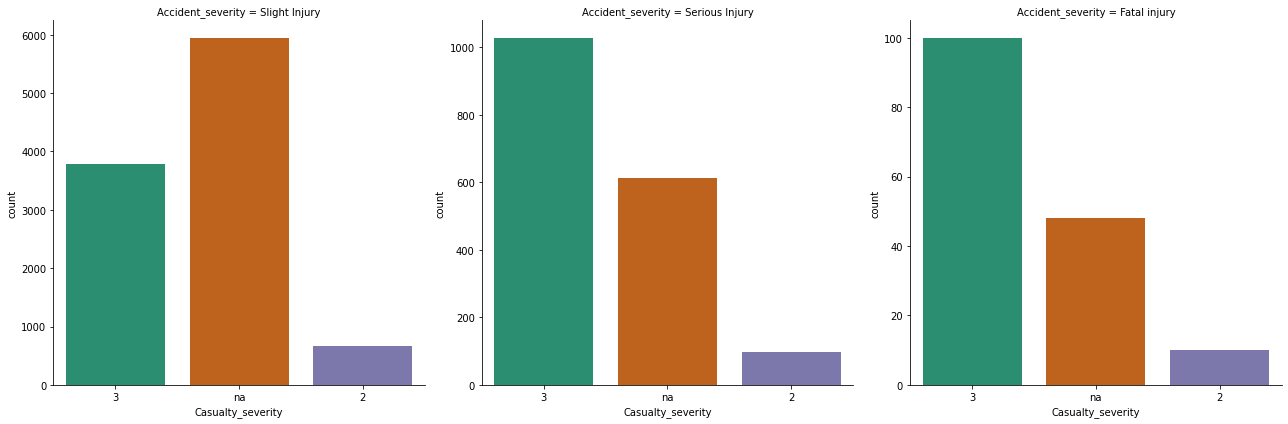

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


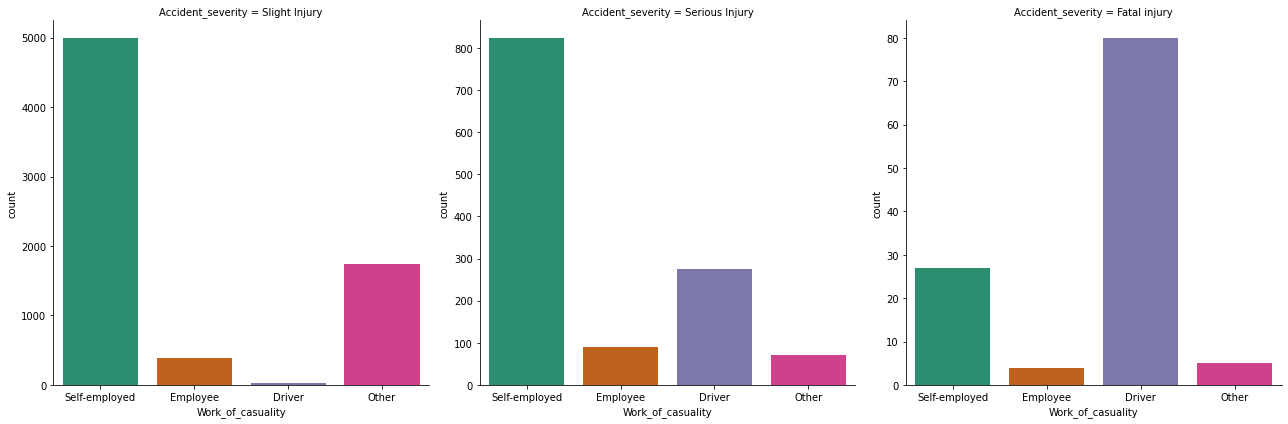

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


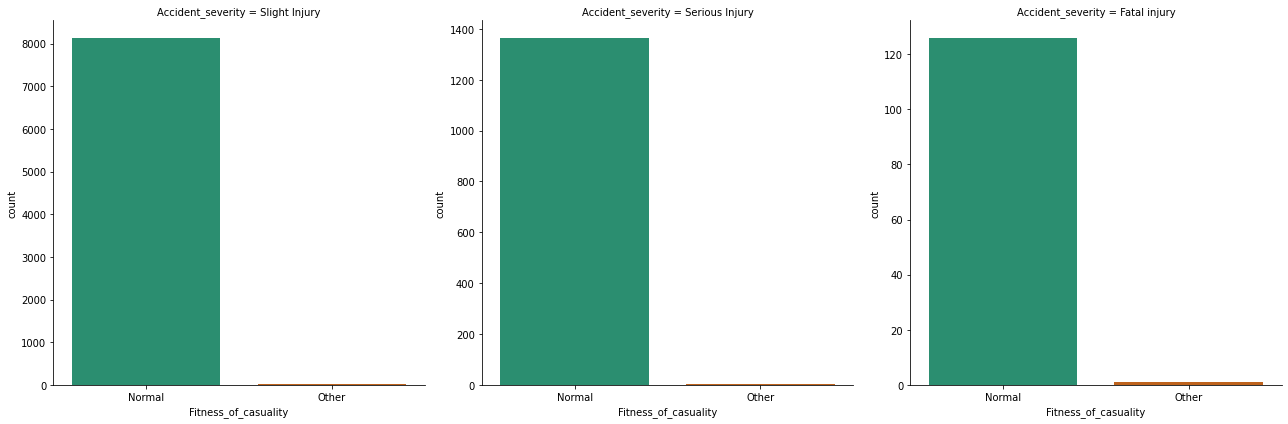

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


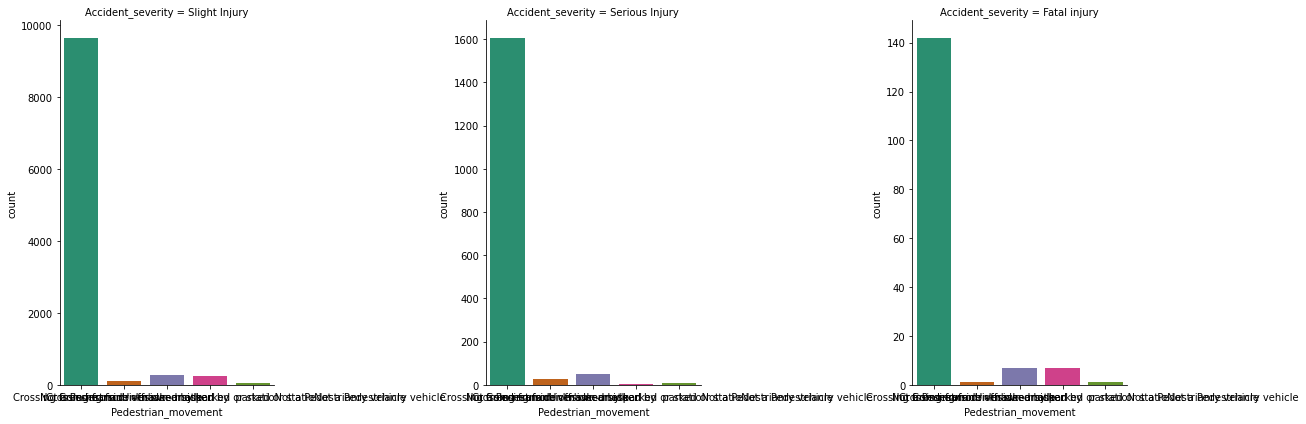

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


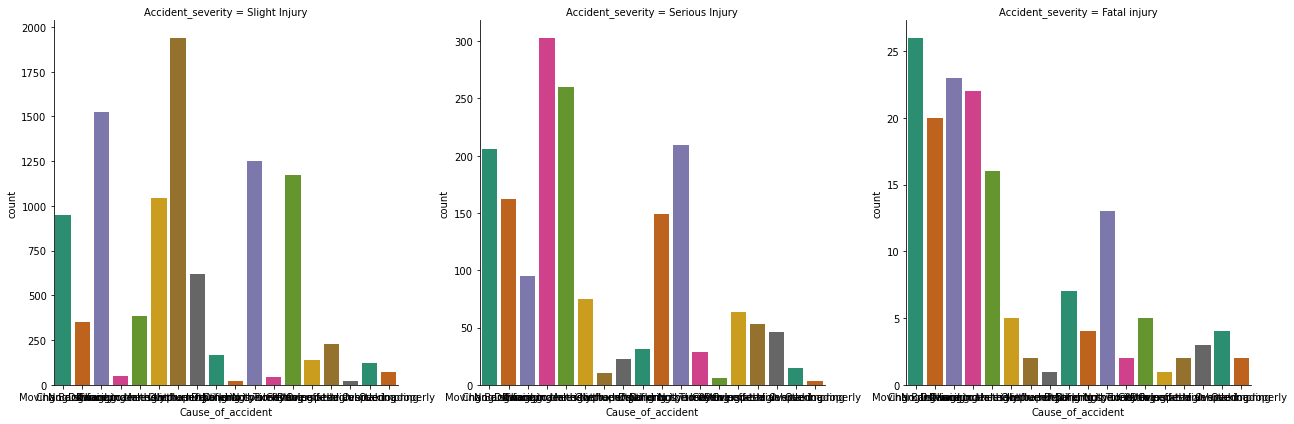

In [ ]:
for col in rta.drop('Accident_severity', axis=1):
    g = sns.FacetGrid(rta, col='Accident_severity', size=6, aspect=1, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

**Observations:**

* Most of the accidents with fatal injuries happened in night.
* Most of the accidents with fatal injuries happened on weekends.
* Fatality occured on saturdays and sundays.
* Highest number of non-fatal injuries happened on fridays.
* Most accidents are caused by drivers aged 18-30 and the least by drivers aged under 18.
* Proportion of fatal accidents are lower for female drivers.
* Drivers with 2-5yrs of experience caused most accidents with fatal injury and those with 5-       10yrs experience caused most accidents with non-fatal injuries.
* Proportion of fatal injuries caused by vehicles with more than 10yrs of service is lower compared to non-fatal injuries.
* Though most of the accident happened around offices, a higher proportion of accidents happened around residential areas have led to fatal injuries.
* Most accidents with fatal injuries occured on undivided two-ways.
* Most accidents with non-fatal injuries occured on two-way divided with broken lines road marking
* Double carriageway has a lower proportion of fatal accidents compared to non-fatal accidents.
* Severity of accidents increases at places with no junctions and the most number of fatal injuries occured at places with no junctions.
* Crossings and Y-shaped junctions shows a decreasing trend with respect to severity of accidents though the numbers are high.
* Most of the accidents with fatal injury have happened at night.
* Collisions with pedestrians have resulted in more fatal injuries compared to non-fatal injuries.
* Accidents with 4 casualties have a huge proportion on fatal injuries compared to non-fatal injuries.
* Accidents involving drivers with 18-30yrs of age have an increasing pattern with respect to severity of injuries.
* Moving backward led to most of the accidents with fatal injuries whereas failing to keep enough distance between vehicles led to more number of accidents with non-fatal injuries.



# Data Cleaning

## Spelling mistake handling

In [ ]:
# replacing misspelled vehicle type names

# Lorry
rta.loc[(rta['Type_of_vehicle'] == "Lorry (41?100Q)") |
         (rta['Type_of_vehicle'] == "Lorry (11?40Q)") |
         (rta['Type_of_vehicle'] == "Pick up upto 10Q")
         , 'Type_of_vehicle'] = 'Lorry'

rta.loc[(rta['Type_of_vehicle'] == "Public (12 seats)") |
         (rta['Type_of_vehicle'] == "Public (13?45 seats)") |
         (rta['Type_of_vehicle'] == "Public (> 45 seats)")
         , 'Type_of_vehicle'] = 'Public Vehicles'




In [ ]:
rta.loc[rta['Defect_of_vehicle'] == "No defect", 'Defect_of_vehicle'] = '0'

In [ ]:
# replacing misspelled Area_accident_occured names

# Rural village areasOffice areas
rta.loc[rta['Area_accident_occured'] == "Rural village areasOffice areas",
        'Area_accident_occured'] = 'Rural village areas or Office areas'


In [ ]:
#to_remove 5 in age band of casuality
rta=rta.drop(rta.index[rta['Age_band_of_casualty']=='5'])

In [ ]:
rta['Cause_of_accident'].replace('Driving at high speed','Overspeed',inplace=True)

<ipython-input-9-a18baa69b8e5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rta['Cause_of_accident'].replace('Driving at high speed','Overspeed',inplace=True)


In [ ]:
from typing import List
def display_cols_value_counts(col_names:List[str]):
    for col_name in col_names:
        print('-'*30)
        print(f"Column: {col_name}")
        print('-'*30)
        print(rta[col_name].value_counts())
        print('')

display_cols_value_counts(rta.columns)

------------------------------
Column: Time
------------------------------
Time
Day      6252
Night    5820
Name: count, dtype: int64

------------------------------
Column: Day_of_week
------------------------------
Day_of_week
Friday       1992
Thursday     1813
Wednesday    1811
Tuesday      1734
Monday       1652
Saturday     1632
Sunday       1438
Name: count, dtype: int64

------------------------------
Column: Age_band_of_driver
------------------------------
Age_band_of_driver
18-30       4181
31-50       4015
Over 51     1561
Unknown     1515
Under 18     800
Name: count, dtype: int64

------------------------------
Column: Sex_of_driver
------------------------------
Sex_of_driver
Male       11210
Female       684
Unknown      178
Name: count, dtype: int64

------------------------------
Column: Educational_level
------------------------------
Educational_level
Junior high school    7469
Elementary school     2116
High school           1094
Above high school      353
Writing 

## Handling Duplicates

No duplicates

## Missing values Handling

In [ ]:
rta.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,724
Vehicle_driver_relation,566
Driving_experience,811
Type_of_vehicle,931
Owner_of_vehicle,472
Service_year_of_vehicle,3866


In [ ]:
# columns with missing values
rta.isna().sum()[rta.isna().sum() != 0]

,0
Educational_level,724
Vehicle_driver_relation,566
Driving_experience,811
Type_of_vehicle,931
Owner_of_vehicle,472
Service_year_of_vehicle,3866
Defect_of_vehicle,4347
Area_accident_occured,234
Lanes_or_Medians,377
Road_allignment,141


In [ ]:
# Calculate the percentage of missing values and round to 2 decimal places
(rta.isna().sum() / rta.shape[0] * 100).round(2)


,0
Time,0.00
Day_of_week,0.00
Age_band_of_driver,0.00
Sex_of_driver,0.00
Educational_level,6.00
Vehicle_driver_relation,4.69
Driving_experience,6.72
Type_of_vehicle,7.71
Owner_of_vehicle,3.91
Service_year_of_vehicle,32.02


In [ ]:
# Fill NaN values with the mode of each column
rta.fillna(rta.mode().iloc[0], inplace=True)

rta.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [ ]:
#rta['Road_surface_type'].fillna(rta['Road_surface_type'].mode()[0],inplace=True)
#rta['Road_allignment'].fillna(rta['Road_allignment'].mode()[0], inplace=True)
#rta['Type_of_collision'].fillna(rta['Type_of_collision'].mode()[0], inplace=True)
#rta['Vehicle_movement'].fillna(rta['Vehicle_movement'].mode()[0], inplace=True)
#rta['Lanes_or_Medians'].fillna(rta['Lanes_or_Medians'].mode()[0], inplace=True)
#rta['Types_of_Junction'].fillna(rta['Types_of_Junction'].mode()[0], inplace=True)
#rta['Educational_level'].fillna(rta['Educational_level'].mode()[0], inplace=True)
#rta['Driving_experience'].fillna(rta['Driving_experience'].mode()[0],inplace=True)
#rta['Type_of_vehicle'].fillna(rta['Type_of_vehicle'].mode()[0],inplace=True)
#rta['Fitness_of_casuality'].fillna(rta['Fitness_of_casuality'].mode()[0],inplace=True)
#rta['Defect_of_vehicle'].fillna(rta['Defect_of_vehicle'].mode()[0],inplace=True)
#rta['Vehicle_driver_relation'].fillna(rta['Vehicle_driver_relation'].mode()[0],inplace=True)
#rta['Owner_of_vehicle'].fillna(rta['Owner_of_vehicle'].mode()[0],inplace=True)
#rta['Work_of_casuality'].fillna(rta['Work_of_casuality'].mode()[0],inplace=True)
#rta['Area_accident_occured'].fillna(rta['Area_accident_occured'].mode()[0],inplace=True)
#rta['Service_year_of_vehicle'].fillna(rta['Service_year_of_vehicle'].mode()[0],inplace=True)


## Handling  "Unknown" and "na" values

> We can handle all null values. But there are also, "Unknown" and "na" as value in the column which is also equal to null.  Have to deal with that too!

In [ ]:
# Replace 'Unknown', 'unknown', and 'na' with the mode of each column
def replace_with_mode(df, values_to_replace=['Unknown', 'unknown', 'na']):
    for column in df.columns:
        mode_value = df[column].mode()[0]  # Get the mode (most frequent value)
        df[column] = df[column].replace(values_to_replace, mode_value)

replace_with_mode(rta)

rta.head()


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Night,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,Night,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public Vehicles,Owner,5-10yrs,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,Night,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry,Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Night,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public Vehicles,Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Night,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Lorry,Owner,5-10yrs,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
#rta.loc[rta['Age_band_of_driver'] == "Unknown", 'Age_band_of_driver'] = '18-30'
#rta.loc[rta['Sex_of_driver'] == "Unknown", 'Sex_of_driver'] = 'Male'
#rta.loc[rta['Driving_experience'] == "unknown", 'Driving_experience'] = '5-10yr'
#rta.loc[rta['Service_year_of_vehicle'] == "Unknown", 'Service_year_of_vehicle'] = '2-5yrs'
#rta.loc[rta['Types_of_Junction'] == "Unknown", 'Types_of_Junction'] = 'Y Shape'
#rta.loc[rta['Lanes_or_Medians'] == "Unknown", 'Lanes_or_Medians'] = 'Two-way (divided with broken lines road marking)'

##rta.loc[rta['Casualty_class'] == "na", 'Casualty_class'] = 'Driver or rider'
#rta.loc[rta['Casualty_severity'] == "na", 'Casualty_severity'] = '3'
#rta.loc[rta['Age_band_of_casualty'] == "na", 'Age_band_of_casualty'] = '18-30'
#rta.loc[rta['Sex_of_casualty'] == "na", 'Sex_of_casualty'] = 'Male'


In [ ]:
rta.describe(include=['O']).T

,count,unique,top,freq
Time,12072,2,Day,6252
Day_of_week,12072,7,Friday,1992
Age_band_of_driver,12072,4,18-30,5696
Sex_of_driver,12072,2,Male,11388
Educational_level,12072,6,Junior high school,8290
Vehicle_driver_relation,12072,3,Employee,10024
Driving_experience,12072,6,5-10yr,4145
Type_of_vehicle,12072,13,Lorry,4388
Owner_of_vehicle,12072,4,Owner,10726
Service_year_of_vehicle,12072,6,Unknown,6682


In the columns 'Age_band_of_casualty' and 'Service_year_of_vehicle', most of the data points are unknown. So better to drop them.

In [ ]:
rta = rta.drop(['Age_band_of_casualty', 'Service_year_of_vehicle'], axis=1)

In [ ]:
from typing import List
def display_cols(col_names:List[str]):
    for col_name in col_names:
        print('-'*30)
        print(f"Column: {col_name}")
        print('-'*30)
        print(rta[col_name].unique())
        print('')

display_cols(rta.columns)

------------------------------
Column: Time
------------------------------
['Night' 'Day']

------------------------------
Column: Day_of_week
------------------------------
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']

------------------------------
Column: Age_band_of_driver
------------------------------
['18-30' '31-50' 'Under 18' 'Over 51']

------------------------------
Column: Sex_of_driver
------------------------------
['Male' 'Female']

------------------------------
Column: Educational_level
------------------------------
['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']

------------------------------
Column: Vehicle_driver_relation
------------------------------
['Employee' 'Owner' 'Other']

------------------------------
Column: Driving_experience
------------------------------
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr']

------------------------------
Column: Ty

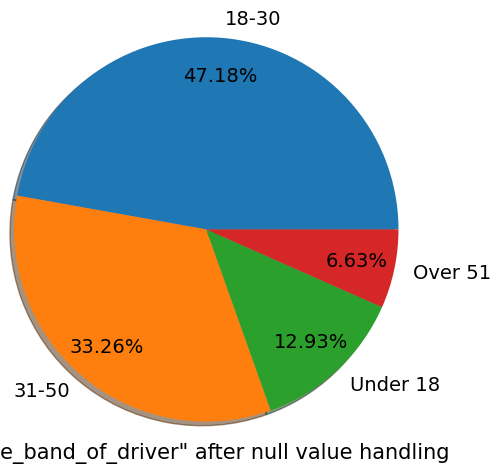

In [ ]:
fig_2=plt.pie(x=rta['Age_band_of_driver'].value_counts(),
        labels=list(rta['Age_band_of_driver'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
plt.xlabel('"Age_band_of_driver" after null value handling', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

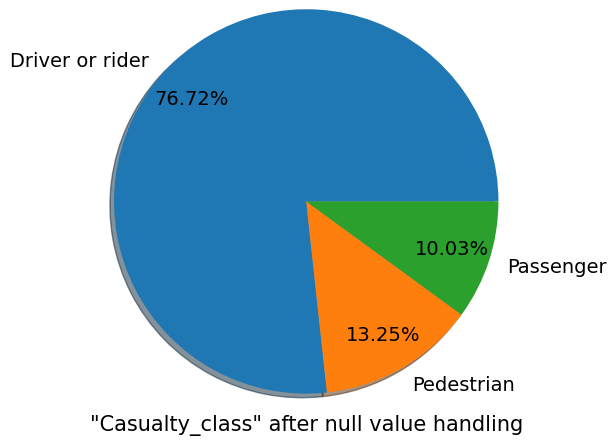

In [ ]:
fig_2=plt.pie(x=rta['Casualty_class'].value_counts(),
        labels=list(rta['Casualty_class'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
plt.xlabel('"Casualty_class" after null value handling', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

## Converting Categorical variables to Numerical

In [ ]:
# Columns of object type
cats_cols = rta.columns[rta.dtypes == 'object']
cats_cols

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Defect_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

### Ordinal Encoding

Map logical categorical columns using dictionary

In [ ]:
rta['Sex_of_driver'] = rta['Sex_of_driver'].map({'Female': 0,
                                                 'Male': 1})
rta['Time'] = rta['Time'].map({'Day': 1,
                               'Night': 0})

rta['Age_band_of_driver'] = rta['Age_band_of_driver'].map({'Under 18': 0,
                                                            '18-30': 1,
                                                            '31-50': 2,
                                                            'Over 51': 3})
rta['Driving_experience'] = rta['Driving_experience'].map({'No Licence': 0,
                                                           'Below 1yr': 1,
                                                           '1-2yr': 2,
                                                           '2-5yr': 3,
                                                           '5-10yr': 4,
                                                           'Above 10yr': 5})
rta['Educational_level'] = rta['Educational_level'].map({'Illiterate': 0,
                                                         'Writing & reading': 1,
                                                         'Elementary school': 2,
                                                         'Junior high school': 3,
                                                         'High school': 4,
                                                         'Above high school': 5})

rta['Accident_severity'] = rta['Accident_severity'].map({'Slight Injury': 0,
                                                         'Serious Injury': 1,
                                                         'Fatal injury': 2})
#rta['Age_band_of_casualty']=rta['Age_band_of_casualty'].map({'Under 18':0,'18-30':1,'31-50':2,'Over 51':3})


#mapped_cols = ['Driving_experience', 'Sex_of_driver', 'Age_band_of_driver', 'Educational_level', 'Time', 'Accident_severity','Service_year_of_vehicle']


### Converting Columns to Integer Type

In [ ]:
rta['Defect_of_vehicle']=rta['Defect_of_vehicle'].astype('int')
rta['Casualty_severity']=rta['Casualty_severity'].astype('int')


In [ ]:
rta.dtypes

,0
Time,float64
Day_of_week,object
Age_band_of_driver,float64
Sex_of_driver,float64
Educational_level,float64
Vehicle_driver_relation,object
Driving_experience,float64
Type_of_vehicle,object
Owner_of_vehicle,object
Defect_of_vehicle,int64


### One Hot Encoding - Nominal Data

In [ ]:
# Columns of object type
cats_cols = rta.columns[rta.dtypes == 'object']
cats_cols

Index(['Day_of_week', 'Vehicle_driver_relation', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Work_of_casuality', 'Fitness_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident'],
      dtype='object')

In [ ]:
for col in cats_cols:
    print(col,":", rta[col].nunique())

Day_of_week : 7
Vehicle_driver_relation : 3
Type_of_vehicle : 13
Owner_of_vehicle : 4
Area_accident_occured : 13
Lanes_or_Medians : 6
Road_allignment : 9
Types_of_Junction : 7
Road_surface_type : 5
Road_surface_conditions : 4
Light_conditions : 4
Weather_conditions : 8
Type_of_collision : 9
Vehicle_movement : 12
Casualty_class : 3
Sex_of_casualty : 2
Work_of_casuality : 6
Fitness_of_casuality : 5
Pedestrian_movement : 9
Cause_of_accident : 18


In [ ]:
rta = pd.get_dummies(rta, columns=['Casualty_class'], prefix=['Casualty_class'],
                     drop_first=False, dtype=int)

In [ ]:
rta.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Defect_of_vehicle,...,Sex_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Casualty_class_Driver or rider,Casualty_class_Passenger,Casualty_class_Pedestrian
0,0,Monday,1,1,5,Employee,2,Automobile,Owner,0,...,Male,3,Driver,Normal,Not a Pedestrian,Moving Backward,0,1,0,0
1,0,Monday,2,1,3,Employee,5,Public Vehicles,Owner,0,...,Male,3,Driver,Normal,Not a Pedestrian,Overtaking,0,1,0,0
2,0,Monday,1,1,3,Employee,2,Lorry,Owner,0,...,Male,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,1,1,0,0
3,0,Sunday,1,1,3,Employee,4,Public Vehicles,Governmental,0,...,Female,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,0,0,0,1
4,0,Sunday,1,1,3,Employee,3,Lorry,Owner,0,...,Male,3,Driver,Normal,Not a Pedestrian,Overtaking,0,1,0,0


### Label Encoding - Nominal Data



* Converting Categorical Feature values to numerical values using Label Encoding.
* Label Encoding provides values from 1 to N.

In [ ]:
from sklearn.preprocessing import LabelEncoder

cats_cols = rta.columns[rta.dtypes == 'object']

for cats_col in cats_cols:
    le = LabelEncoder()
    rta[cats_col] = le.fit_transform(rta[cats_col])
rta.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Defect_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,0,1,1,1,5,0,2,0,3,0,...,2,2,0,1,3,0,2,5,8,0
1,0,1,2,1,3,0,5,7,3,0,...,2,2,0,1,3,0,2,5,15,0
2,0,1,1,1,3,0,2,4,3,0,...,2,2,0,1,3,0,2,5,0,1
3,0,3,1,1,3,0,4,7,0,0,...,2,2,2,0,3,0,2,5,1,0
4,0,3,1,1,3,0,3,4,3,0,...,2,2,0,1,3,0,2,5,15,0


In [ ]:

rta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12072 entries, 0 to 12314
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Time                         12072 non-null  int64
 1   Day_of_week                  12072 non-null  int64
 2   Age_band_of_driver           12072 non-null  int64
 3   Sex_of_driver                12072 non-null  int64
 4   Educational_level            12072 non-null  int64
 5   Vehicle_driver_relation      12072 non-null  int64
 6   Driving_experience           12072 non-null  int64
 7   Type_of_vehicle              12072 non-null  int64
 8   Owner_of_vehicle             12072 non-null  int64
 9   Defect_of_vehicle            12072 non-null  int64
 10  Area_accident_occured        12072 non-null  int64
 11  Lanes_or_Medians             12072 non-null  int64
 12  Road_allignment              12072 non-null  int64
 13  Types_of_Junction            12072 non-null  int64


# Data Transformations - Numerical data analysis

In [ ]:
### Let's analyze and clean out the numerical columns first.

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_features=[rta.select_dtypes(include=numerics).columns]
print(numeric_features)

[Index(['Number_of_vehicles_involved', 'Number_of_casualties'], dtype='object')]


In [ ]:
# checking the numerical statistics of our data
rta.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12072.0,2.036365,0.684941,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12072.0,1.543572,1.001411,1.0,1.0,1.0,2.0,8.0


In [ ]:
### Lets check the values of the features, so that we can come across the unique value

rta['Number_of_vehicles_involved'].value_counts()

2    8196
1    1963
3    1529
4     335
6      42
7       7
Name: Number_of_vehicles_involved, dtype: int64



* No, incorrect values are present in
"Number_of_vehicles_involved" Feature.

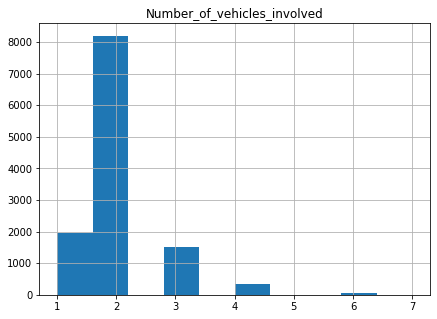

In [ ]:
rta.hist('Number_of_vehicles_involved', figsize=(7,5))
plt.show()

In [ ]:
rta['Number_of_casualties'].value_counts()

1    8244
2    2252
3     883
4     380
5     199
6      84
7      22
8       8
Name: Number_of_casualties, dtype: int64

* Same for"Number_of_casualties" feature too.

### Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


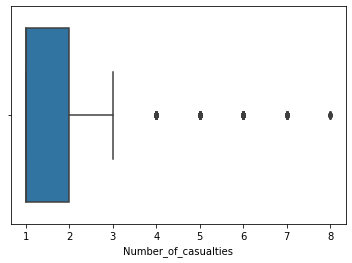

In [ ]:
sns.boxplot(rta['Number_of_casualties'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


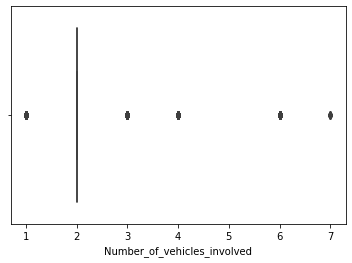

In [ ]:
sns.boxplot(rta['Number_of_vehicles_involved'])
plt.show()

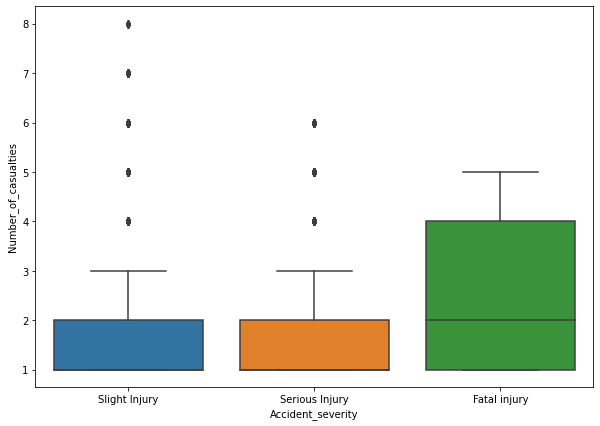

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=rta, x='Accident_severity', y='Number_of_casualties')
plt.show()

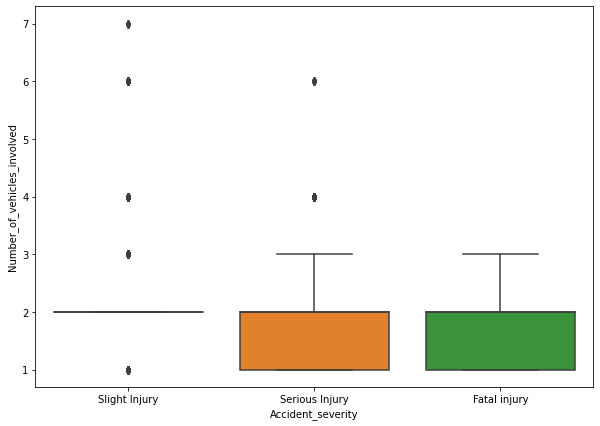

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=rta, x='Accident_severity', y='Number_of_vehicles_involved')
plt.show()

###Correlation of numerical variables

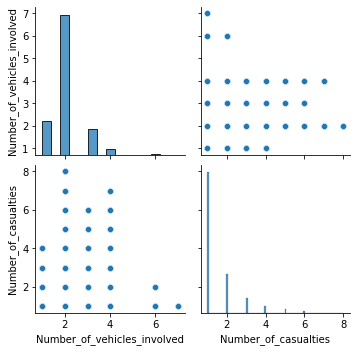

In [ ]:
sns.pairplot(rta[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

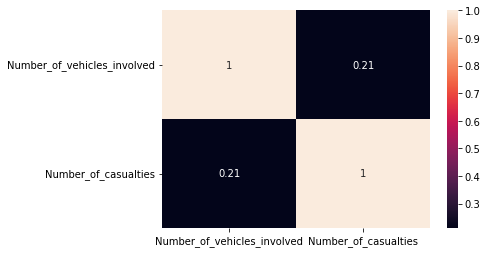

In [ ]:
correlation_matrix = rta[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

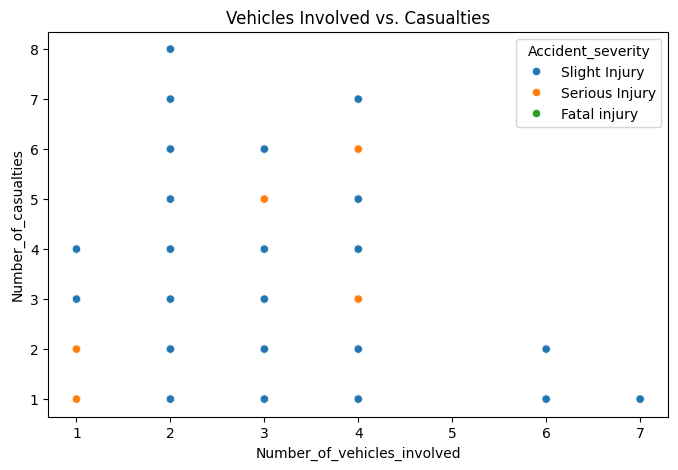

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Number_of_vehicles_involved', y='Number_of_casualties',
                hue='Accident_severity', data=rta)
plt.title("Vehicles Involved vs. Casualties")
plt.show()

Inference:

We really may need "Number_of_vehicles_involved" because that might be lead to severity of accident (for Example: If number of vehicles is 2 and If lorry and bike collided, then the severity of bike rider is severe, elif bike and bike slight injury, and so on.. cases).

1. We may or may not need the "Number_of_vehicles_involved", but there is a 1 supporting case, so this may be a useful feature as data cannot be lost if there is a slight chance of dependency.

2. Coming to "Number_of_casualities", we really dont consider the number of patients. As we are aiming for severity of accident. So, we can drop the "Number_of_casualities" column.

3. In this heatmap, we can find that these are not much extremely correlated variables

### Scaling

No need of scaling here!!!!

###Correlation - Non relvant columns

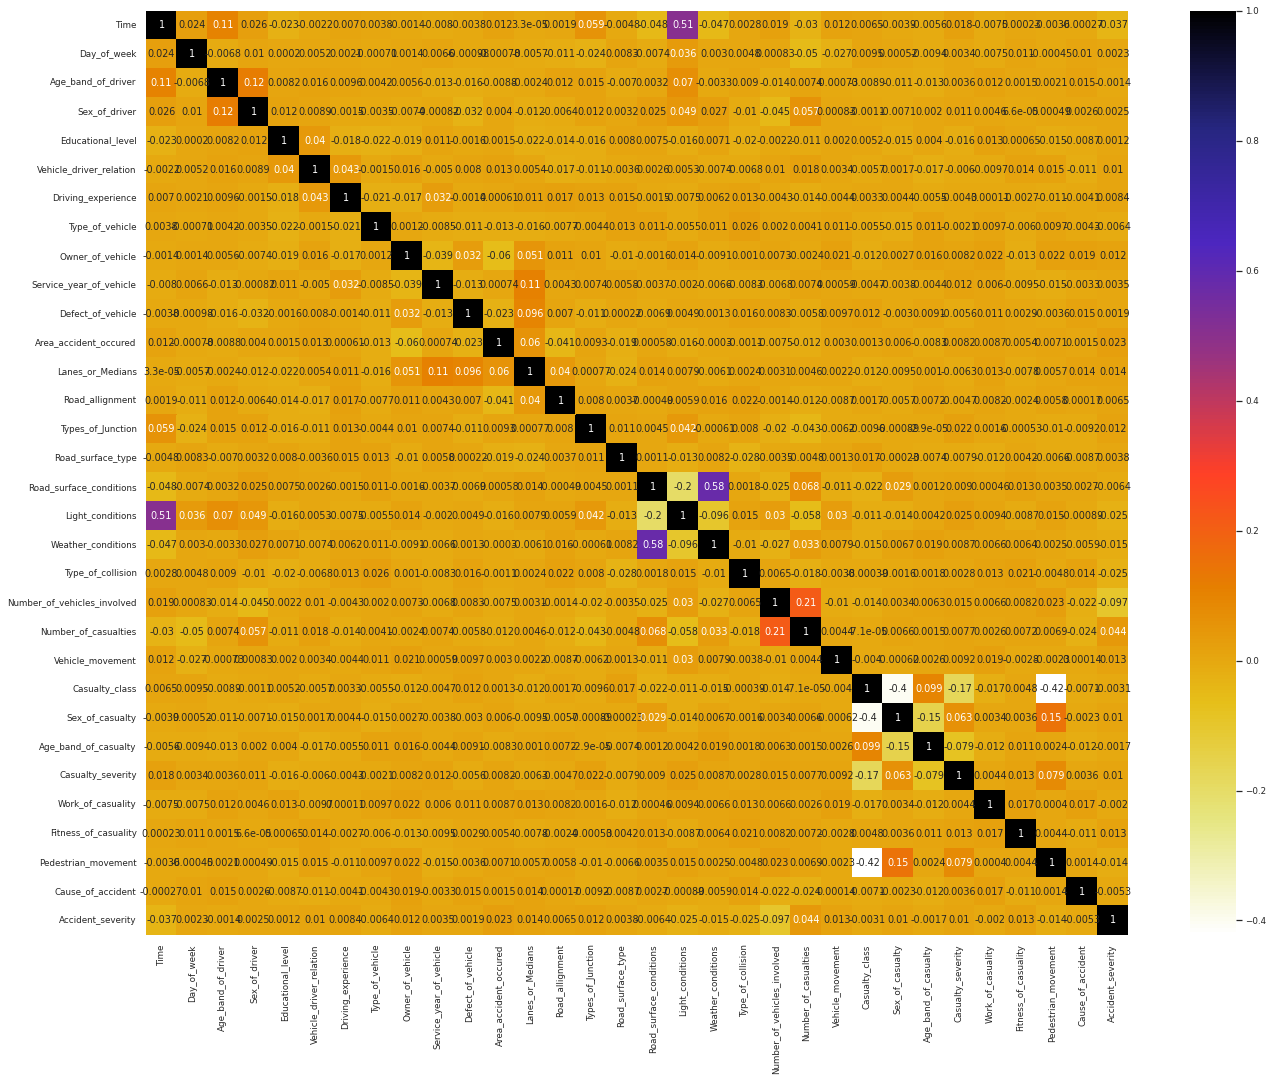

In [ ]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(rta.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [ ]:
rta_data_corr = rta.corr()
rta_data_corr.style.background_gradient(cmap="cool")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
Time,1.000000,0.024190,0.105250,0.025985,-0.022918,-0.002171,0.007042,0.003785,-0.001409,-0.007980,-0.003795,0.011714,0.000033,0.001913,0.058811,-0.004780,-0.048102,0.508117,-0.046881,0.002777,0.018551,-0.030199,0.011985,0.006495,-0.003870,-0.005641,0.018245,-0.007473,0.000227,-0.003636,-0.000268,-0.037389
Day_of_week,0.024190,1.000000,-0.006787,0.010400,0.000202,0.005210,0.002082,-0.000712,0.001442,0.006576,-0.000975,-0.000781,-0.005737,-0.011228,-0.024329,0.008332,-0.007371,0.036251,0.003031,0.004783,0.000834,-0.050139,-0.027064,0.009490,0.000524,-0.009430,0.003420,-0.007481,0.010640,-0.000455,0.010171,0.002276
Age_band_of_driver,0.105250,-0.006787,1.000000,0.119110,0.008227,0.015687,0.009553,0.004203,0.005607,-0.013388,-0.015732,-0.008772,-0.002406,0.012202,0.015123,-0.007022,0.003150,0.070471,-0.003335,0.009009,-0.014272,0.007378,-0.000727,-0.008875,-0.010565,-0.012546,0.003600,0.011741,0.001539,0.002122,0.015443,-0.001427
Sex_of_driver,0.025985,0.010400,0.119110,1.000000,0.012307,0.008885,-0.001464,-0.003511,-0.007405,-0.000818,-0.031793,0.004029,-0.011804,-0.006438,0.011906,0.003196,0.025067,0.049352,0.027161,-0.010297,-0.044532,0.056822,0.000831,-0.001111,-0.007057,0.002000,0.010685,0.004620,0.000066,0.000495,0.002603,0.002501
Educational_level,-0.022918,0.000202,0.008227,0.012307,1.000000,0.040140,-0.017552,-0.022140,-0.019296,0.010760,-0.001587,0.001526,-0.021807,-0.014195,-0.015896,0.007964,0.007521,-0.015727,0.007142,-0.019579,-0.002230,-0.010539,0.002013,0.005228,-0.015304,0.003956,-0.015515,0.013028,0.000648,-0.014885,-0.008703,0.001166
Vehicle_driver_relation,-0.002171,0.005210,0.015687,0.008885,0.040140,1.000000,0.042910,-0.001536,0.016361,-0.005024,0.008027,0.013067,0.005431,-0.017345,-0.011104,-0.003598,0.002579,0.005292,-0.007434,-0.006777,0.010113,0.018381,0.003399,-0.005721,0.001663,-0.017225,-0.005950,-0.009701,0.014070,0.015288,-0.011300,0.010143
Driving_experience,0.007042,0.002082,0.009553,-0.001464,-0.017552,0.042910,1.000000,-0.021190,-0.016621,0.031690,-0.001384,0.000615,0.011276,0.016960,0.013416,0.014764,-0.001467,-0.007506,0.006206,0.012857,-0.004287,-0.014125,-0.004399,0.003291,0.004443,-0.005461,-0.004307,0.000111,-0.002666,-0.010587,-0.004108,0.008366
Type_of_vehicle,0.003785,-0.000712,0.004203,-0.003511,-0.022140,-0.001536,-0.021190,1.000000,0.001249,-0.008508,-0.011162,-0.012952,-0.016055,-0.007705,-0.004380,0.013317,0.011278,-0.005471,0.010955,0.025839,0.002026,0.004132,0.010707,-0.005474,-0.015132,0.011421,-0.002051,0.009721,-0.006002,0.009741,-0.004278,-0.006361
Owner_of_vehicle,-0.001409,0.001442,0.005607,-0.007405,-0.019296,0.016361,-0.016621,0.001249,1.000000,-0.038524,0.032038,-0.059868,0.050667,0.011449,0.010220,-0.010093,-0.001566,0.014399,-0.009072,0.001014,0.007337,-0.002421,0.021395,-0.012318,0.002729,0.016464,0.008221,0.021606,-0.012989,0.022303,0.018754,0.011701
Service_year_of_vehicle,-0.007980,0.006576,-0.013388,-0.000818,0.010760,-0.005024,0.031690,-0.008508,-0.038524,1.000000,-0.012788,0.000741,0.106639,0.004338,0.007415,0.005849,-0.003741,-0.001993,-0.006585,-0.008340,-0.006774,0.007378,0.000593,-0.004730,-0.003759,-0.004387,0.012313,0.005998,-0.009459,-0.014834,-0.003269,0.003522


In [ ]:
rta.corr()['Accident_severity'].sort_values(ascending=False)

Accident_severity              1.000000
Number_of_casualties           0.043857
Area_accident_occured          0.022837
Lanes_or_Medians               0.013666
Fitness_of_casuality           0.012889
Vehicle_movement               0.012717
Owner_of_vehicle               0.011701
Types_of_Junction              0.011552
Casualty_severity              0.010430
Vehicle_driver_relation        0.010143
Sex_of_casualty                0.010039
Driving_experience             0.008366
Road_allignment                0.006488
Road_surface_type              0.003821
Service_year_of_vehicle        0.003522
Sex_of_driver                  0.002501
Day_of_week                    0.002276
Defect_of_vehicle              0.001915
Educational_level              0.001166
Age_band_of_driver            -0.001427
Age_band_of_casualty          -0.001713
Work_of_casuality             -0.002040
Casualty_class                -0.003112
Cause_of_accident             -0.005288
Type_of_vehicle               -0.006361


**Observing useful features:**

As from the data, we are classifying the severity of accident happened.
1. So, we really dont need the date and time of particular instance. So, they can be left out.
2. Age_band_of_driver really would be an important feature, as the age signifes the immunity of patient. If the patient is older human (>50 or >60), his immunity levels are not so high so the injuries/recovering wont happen so easily. So, we can consider this.

3. Sex_of_driver, can be considered.

4. Educational_level doesn't really matter, while we are focussing on accident severity. We really dont think of educational_level when an accident happened to the person, we check for his condition. Whether he is educated or un-educated, the severity of accident wont show any kindness to the person. so, we can drop this.
5. Vehicle_driver_relation too doesnt matter, as we dont need whether he is a owner of it or not.

6. Driving_experience it may be useful, so we can consider
7. Type_of_vehicle it may be useful, suppose if it is a lorry, we can try to conclude the severity of accident.

8. Owner_of_vehicle, can be left out as we dont do any thing with owner.

9. Service_year_of_vehicle, this feature can be helpful as it specifies the condition of vehicle.

10. Defect_of_vehicle, can be considered for the condition as of "Service_year_of_vehicle".

11. Area_accident_occured, dont really matter the severity really depends on collision of two/three vehicles or other irrespective of place.

12. Lanes_or_medians,Road_alignment,Types_of_junction can be considered.


13. Road_surface_type, may be helpful in resulting of severity. Suppose, if the patient would fall from large distances or from highway which is at a height to normal layout road.

14. Road_surface_conditions, can be considered like "Road_surface_type".

15. Light_conditions and Weather_conditions can be considered because this may result in accidents.


16. Type_of_collision, can be considered.

17. Vehilce_movement, may be helpful.

18. Causalty_class, may be useful.

19. Sex_of_casualty, can be dropped.

20. Age_band_of_casulity, can be considered.

21. Casuality_severity, can be considered.

22. Work_of_casuality, can be dropped as we dont need any inferences from the patient's work.

23. Fitness_of_casuality, can be considered.

24. Pedestrian_movement, can be dropped.

25. Cause_of_accident, can be considered. It  is an important feature.


# Model Building

In [ ]:
x = rta.drop(['Accident_severity'],axis=1)
y = rta['Accident_severity']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Other Feature selection Methods

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k='all')

Feature 0: 7.239915
Feature 1: 0.185696
Feature 2: 0.261643
Feature 3: 1.496129
Feature 4: 0.082232
Feature 5: 1.474994
Feature 6: 1.755807
Feature 7: 0.040575
Feature 8: 0.780511
Feature 9: 0.655740
Feature 10: 1.248425
Feature 11: 2.279034
Feature 12: 1.603601
Feature 13: 0.485167
Feature 14: 0.309789
Feature 15: 0.761822
Feature 16: 1.073330
Feature 17: 5.932595
Feature 18: 2.353924
Feature 19: 3.120072
Feature 20: 49.029182
Feature 21: 29.418070
Feature 22: 0.928593
Feature 23: 0.261134
Feature 24: 1.217238
Feature 25: 0.244774
Feature 26: 0.492952
Feature 27: 0.081748
Feature 28: 1.285731
Feature 29: 1.285018
Feature 30: 0.108389


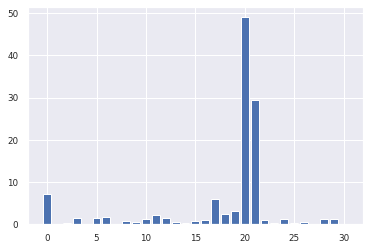

In [ ]:
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)


import matplotlib.pyplot as plt
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)


import matplotlib.pyplot as plt
for i in range(len(fs.scores_)):
    print( fs.scores_[i])

7.239914709904449
0.18569578791491453
0.26164254868455317
1.4961286983887228
0.08223151495264724
1.4749935835500396
1.755806931198816
0.040574839521609785
0.7805106552388977
0.6557400219966605
1.2484254880117898
2.279033826359933
1.6036008244637354
0.4851670084741135
0.30978853942849655
0.7618224690640304
1.0733303438383022
5.9325951614857395
2.353924205226204
3.1200716153656898
49.02918182478265
29.418070454244667
0.9285931943774838
0.26113389907873896
1.217237712729003
0.244773525363584
0.492952174297285
0.08174770720473366
1.2857312671556114
1.2850178173116495
0.1083890309867087


In [ ]:
best_features = pd.DataFrame({
    'Feature': ['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident'],
    'f_Score': ['7.239914709904449','0.18569578791491453','0.26164254868455317','1.4961286983887228','0.08223151495264724',
'1.4749935835500396','1.755806931198816',
'0.040574839521609785',
'0.7805106552388977',
'0.6557400219966605',
'1.2484254880117898',
'2.279033826359933',
'1.6036008244637354',
'0.4851670084741135',
'0.30978853942849655',
'0.7618224690640304',
'1.0733303438383022',
'5.9325951614857395',
'2.353924205226204',
'3.1200716153656898',
'49.02918182478265',
'29.418070454244667',
'0.9285931943774838',
'0.26113389907873896',
'1.217237712729003',
'0.244773525363584',
'0.492952174297285',
'0.0817477072047336',
'1.2857312671556114',
'1.2850178173116495',
0.1083890309867087]})
#best_features = best_features.sort_values(by='f_Score', ascending=False)
best_features = best_features.set_index('Feature')
best_features

,f_Score
Feature,
Time,7.239914709904449
Day_of_week,0.18569578791491453
Age_band_of_driver,0.26164254868455317
Sex_of_driver,1.4961286983887228
Educational_level,0.08223151495264724
Vehicle_driver_relation,1.4749935835500396
Driving_experience,1.755806931198816
Type_of_vehicle,0.040574839521609785
Owner_of_vehicle,0.7805106552388977


In [ ]:
best_features.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model, strong regularization')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

TypeError: ignored

In [ ]:
#Irrelevent columns
#rta.drop('Service_year_of_vehicle', axis=1, inplace=True)
#rta.drop('Vehicle_driver_relation', axis=1, inplace=True)
#rta.drop('Owner_of_vehicle', axis=1, inplace=True)
#rta.drop('Area_accident_occured', axis=1, inplace=True)
rta.drop('Work_of_casuality', axis=1, inplace=True)
#rta.drop('Sex_of_casualty',axis=1,inplace=True)
#rta.drop('Pedestrian_movement',axis=1,inplace=True)

###2.Linear model inspection



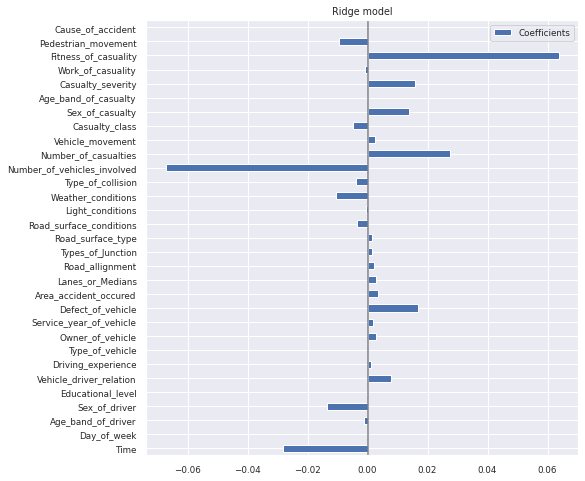

In [ ]:
from sklearn.linear_model import RidgeCV

model = RidgeCV()

model.fit(x_train, y_train)

coefs = pd.DataFrame(
   model.coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(10, 8))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)


###3.Scale of coefficients

(0.0, 100.0)

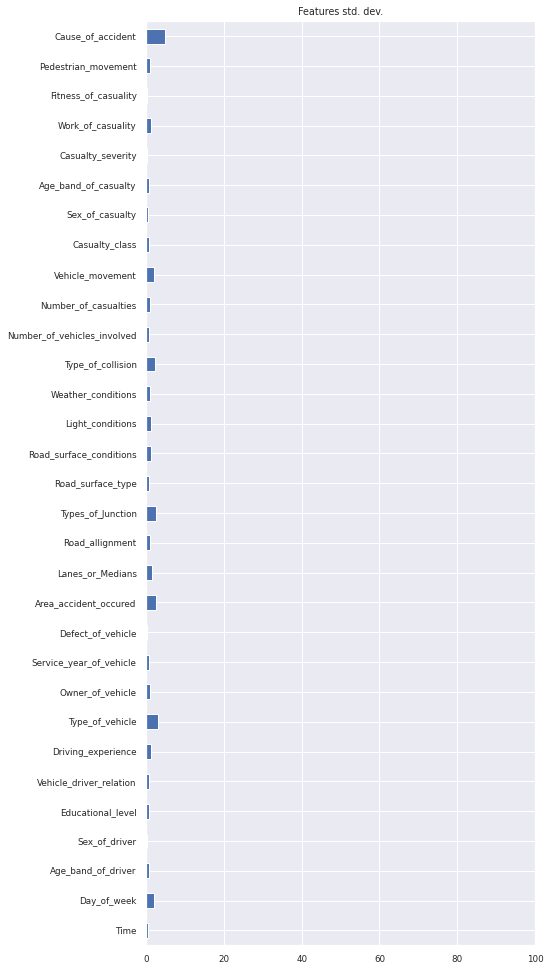

In [ ]:
x_train.std(axis=0).plot(kind='barh', figsize=(9, 17))
plt.title('Features std. dev.')
plt.subplots_adjust(left=.3)
plt.xlim((0, 100))

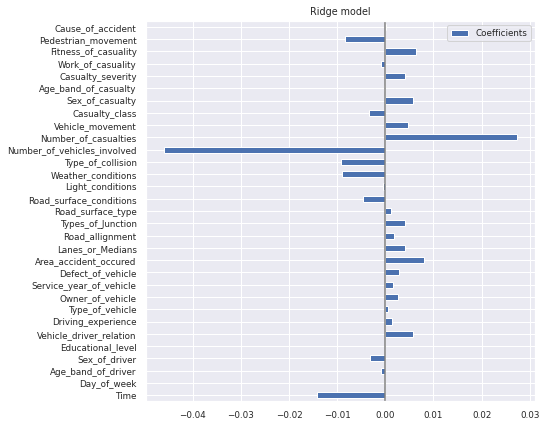

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), RidgeCV())

model.fit(x_train, y_train)

coefs = pd.DataFrame(
   model[1].coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)



###4.Linear models with sparse coefficients (Lasso)

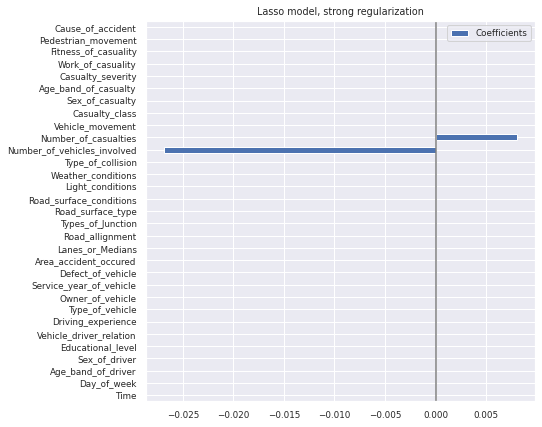

In [ ]:
from sklearn.linear_model import Lasso

model = make_pipeline(StandardScaler(), Lasso(alpha=.015))

model.fit(x_train, y_train)

coefs = pd.DataFrame(
   model[1].coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model, strong regularization')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

###5.RandomForest feature_importances

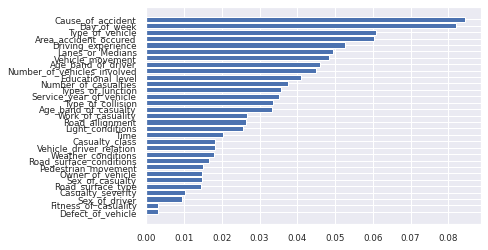

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])


###6.Feature importance by permutation

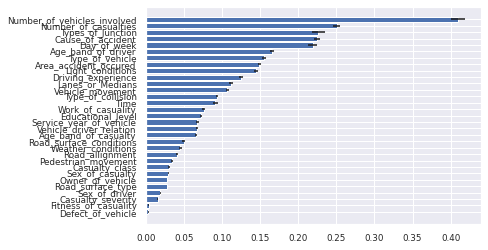

In [ ]:
# Any model could be used here

model = RandomForestRegressor()
# model = make_pipeline(StandardScaler(),
#                       RidgeCV())

model.fit(x_train, y_train)
def get_score_after_permutation(model, x, y, curr_feat):
    """ return the score of model when curr_feat is permuted """

    x_permuted = x.copy()
    col_idx = list(x.columns).index(curr_feat)
    # permute one column
    x_permuted.iloc[:, col_idx] = np.random.permutation(
        x_permuted[curr_feat].values)

    permuted_score = model.score(x_permuted, y)
    return permuted_score


def get_feature_importance(model, x, y, curr_feat):
    """ compare the score when curr_feat is permuted """

    baseline_score_train = model.score(x, y)
    permuted_score_train = get_score_after_permutation(model, x, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance


curr_feat = 'Cause_of_accident'

feature_importance = get_feature_importance(model, x_train, y_train, curr_feat)


n_repeats = 10

list_feature_importance = []
for n_round in range(n_repeats):
    list_feature_importance.append(
        get_feature_importance(model, x_train, y_train, curr_feat))

def permutation_importance(model, x, y, n_repeats=10):
    """Calculate importance score for each feature."""

    importances = []
    for curr_feat in x.columns:
        list_feature_importance = []
        for n_round in range(n_repeats):
            list_feature_importance.append(
                get_feature_importance(model, x, y, curr_feat))

        importances.append(list_feature_importance)

    return {'importances_mean': np.mean(importances, axis=1),
            'importances_std': np.std(importances, axis=1),
            'importances': importances}

# This function could directly be access from sklearn
# from sklearn.inspection import permutation_importance

def plot_feature_importances(perm_importance_result, feat_name):
    """ bar plot the feature importance """

    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])


perm_importance_result_train = permutation_importance(
    model, x_train, y_train, n_repeats=10)

plot_feature_importances(perm_importance_result_train, x_train.columns)
figsize=(15, 17)

